# ŒßœÅŒøŒΩŒøœÉŒµŒπœÅŒ≠œÇ Lorentz

## 1. ŒïŒ≥Œ∫Œ±œÑŒ¨œÉœÑŒ±œÉŒ∑ Œ≤ŒπŒ≤ŒªŒπŒøŒ∏Œ∑Œ∫œéŒΩ
#### NumPy ‚Üí œÑŒ±œáœçœÇ œáŒµŒπœÅŒπœÉŒºœåœÇ œÄŒπŒΩŒ¨Œ∫œâŒΩ.
#### SciPy ‚Üí Œ≠œÑŒøŒπŒºŒøŒπ ŒøŒªŒøŒ∫ŒªŒ∑œÅœâœÑŒ≠œÇ ODE (œÄ.œá. solve_ivp).
#### Matplotlib ‚Üí Œ≥œÅŒ±œÜŒÆŒºŒ±œÑŒ± 2-D & 3-D.
#### pandas ‚Üí ŒµœÖŒ≠ŒªŒπŒ∫œÑŒø data container (DataFrame).



In [8]:
import pandas as pd
import numpy as np
from scipy.integrate import solve_ivp        # ŒµŒΩŒ±ŒªŒªŒ±Œ∫œÑŒπŒ∫Œ¨: from scipy.integrate import odeint
import matplotlib.pyplot as plt
from pyrcn.echo_state_network import ESNRegressor
from sklearn.preprocessing import MinMaxScaler

from numpy import array
import math
import csv


## 2. ŒüœÅŒπœÉŒºœåœÇ œÄŒ±œÅŒ±ŒºŒ≠œÑœÅœâŒΩ & ŒµŒæŒπœÉœéœÉŒµœâŒΩ Lorenz
#### ŒµŒæŒπœÉœéœÉŒµŒπœÇ Lorentz:
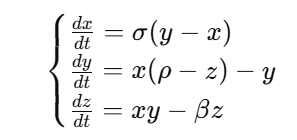

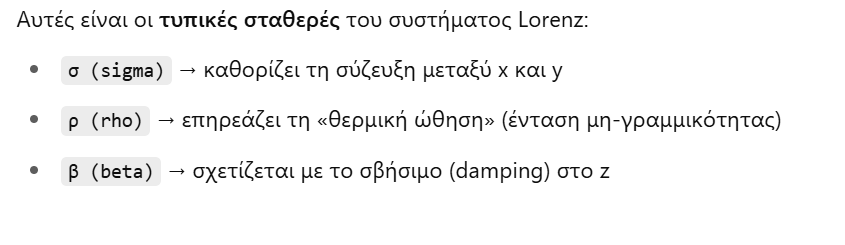


In [9]:
# Œ†Œ±œÅŒ¨ŒºŒµœÑœÅŒøŒπ
sigma = 10.0          # Œ≠ŒΩœÑŒ±œÉŒ∑ ¬´œÄŒµœÅŒπœÉœÑœÅŒøœÜŒπŒ∫Œøœç¬ª œåœÅŒøœÖ (œÉœáŒµœÑŒπŒ∫œå ŒºŒµ Prandtl)
beta  = 8.0 / 3.0     # Œ≥ŒµœâŒºŒµœÑœÅŒπŒ∫œåœÇ/Œ±Œ≥œéŒ≥ŒπŒºŒøœÇ œÉœÖŒΩœÑŒµŒªŒµœÉœÑŒÆœÇ
rho   = 28.0          # ¬´Œ∏ŒµœÅŒºŒπŒ∫ŒÆ œéŒ∏Œ∑œÉŒ∑¬ª (Rayleigh number)

# 3.2 Œ£œÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ œÄŒøœÖ Œ¥ŒØŒΩŒµŒπ œÑŒ± œÄŒ±œÅŒ¨Œ≥œâŒ≥Œ±
def lorenz(t, state):
    """
    t      : œÑœÅŒ≠œáœâŒΩ œáœÅœåŒΩŒøœÇ (float, Œ±ŒªŒªŒ¨ Œ¥ŒµŒΩ œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒµŒØœÑŒ±Œπ œÅŒ∑œÑŒ¨)
    state  : Œ¥ŒπŒ¨ŒΩœÖœÉŒºŒ± [x, y, z] œÑŒ∑ œáœÅŒøŒΩŒπŒ∫ŒÆ œÉœÑŒπŒ≥ŒºŒÆ t
    return : ŒªŒØœÉœÑŒ± [dx/dt, dy/dt, dz/dt]
    """
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]


## 3. Œ°œçŒ∏ŒºŒπœÉŒ∑ œáœÅŒøŒΩŒπŒ∫Œøœç œÄŒªŒ≠Œ≥ŒºŒ±œÑŒøœÇ & Œ±œÅœáŒπŒ∫œéŒΩ œÉœÖŒΩŒ∏Œ∑Œ∫œéŒΩ

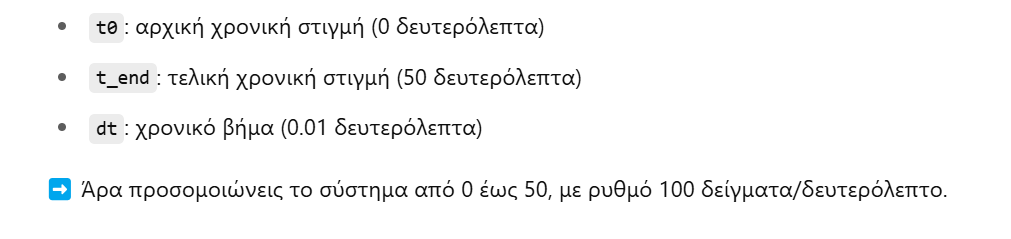

In [10]:
t0, t_end, dt = 0.0, 50.0, 0.01       # Œ±œÄœå 0 œâœÇ 50 "Œ¥ŒµœÖœÑŒµœÅœåŒªŒµœÄœÑŒ±" ŒºŒµ Œ≤ŒÆŒºŒ± 0.01
t_eval = np.arange(t0, t_end + dt, dt)  # œÉŒ∑ŒºŒµŒØŒø-œÉŒ∑ŒºŒµŒØŒø ŒµŒæŒ±Œ≥œâŒ≥ŒÆœÇ

initial_state = [1.0, 1.0, 1.0]       # x0, y0, z0


## 4. ŒëœÅŒπŒ∏ŒºŒ∑œÑŒπŒ∫ŒÆ ŒøŒªŒøŒ∫ŒªŒÆœÅœâœÉŒ∑
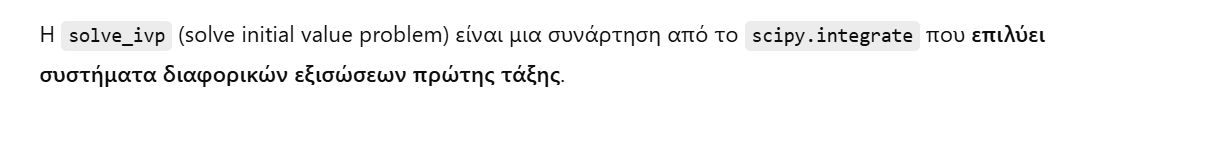


In [11]:
sol = solve_ivp(
    lorenz,                # Œ∑ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ ŒºŒµ œÑŒ± œÄŒ±œÅŒ¨Œ≥œâŒ≥Œ±
    (t0, t_end),           # œáœÅŒøŒΩŒπŒ∫œå Œ¥ŒπŒ¨œÉœÑŒ∑ŒºŒ± ŒøŒªŒøŒ∫ŒªŒÆœÅœâœÉŒ∑œÇ
    initial_state,         # Œ±œÅœáŒπŒ∫Œ≠œÇ œÑŒπŒºŒ≠œÇ
    method="RK45",         # Dormand‚ÄìPrince 4(5)
    t_eval=t_eval,         # œÄŒøœç Œ∏ŒµœÇ Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒ±
    rtol=1e-9, atol=1e-12  # Œ≠ŒªŒµŒ≥œáŒøœÇ œÉœÜŒ¨ŒªŒºŒ±œÑŒøœÇ
)


In [12]:
t = sol.t
x, y, z = sol.y          # "ŒæŒµŒ¥ŒπœÄŒªœéŒΩŒøœÖŒºŒµ" œÑŒπœÇ œÑœÅŒµŒπœÇ œáœÅŒøŒΩŒøœÉŒµŒπœÅŒ≠œÇ


## Normalize Lorenz state variables x, y, z into the range [-1, 1]


In [ ]:

# Assume x, y, z are 1-D numpy arrays of the same length
# Stack them into a single (n_steps, 3) array for joint scaling
data = np.column_stack((x, y, z))  # shape: (n_steps, 3)

# Create a MinMaxScaler that maps to [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit the scaler on the combined data and transform in one step
data_scaled = scaler.fit_transform(data)

# Unpack the scaled columns back into x, y, z
x_scaled, y_scaled, z_scaled = data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2]

# (Optional) Replace original variables with scaled versions for ESN input
x, y, z = x_scaled, y_scaled, z_scaled


In [13]:
data = np.column_stack((x, y, z))
scaler = MinMaxScaler(feature_range=(-1, 1))
data_scaled = scaler.fit_transform(data)
x, y, z = data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2]

## 5. ŒúŒµœÑŒ±œÑœÅŒøœÄŒÆ œÉŒµ DataFrame



In [14]:
df = (
    pd.DataFrame({"t": t, "x": x, "y": y, "z": z})
      .set_index("t")        # œáœÅœåŒΩŒøœÇ œâœÇ index ‚áí Œ≠œÑŒøŒπŒºŒø Œ≥ŒπŒ± resample/rolling
)
df.head()                    # Œ¥ŒµŒØœáŒΩŒµŒπ œÑŒπœÇ 5 œÄœÅœéœÑŒµœÇ Œ≥œÅŒ±ŒºŒºŒ≠œÇ


x         y         z
t                                 
0.00 -0.007026 -0.046285 -0.998367
0.01 -0.006344 -0.035898 -0.999012
0.02 -0.004377 -0.025346 -0.999515
0.03 -0.001208 -0.014384 -0.999854
0.04  0.003115 -0.002787 -1.000000

## 6. ŒüœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ œáœÅŒøŒΩŒøœÉŒµŒπœÅœéŒΩ


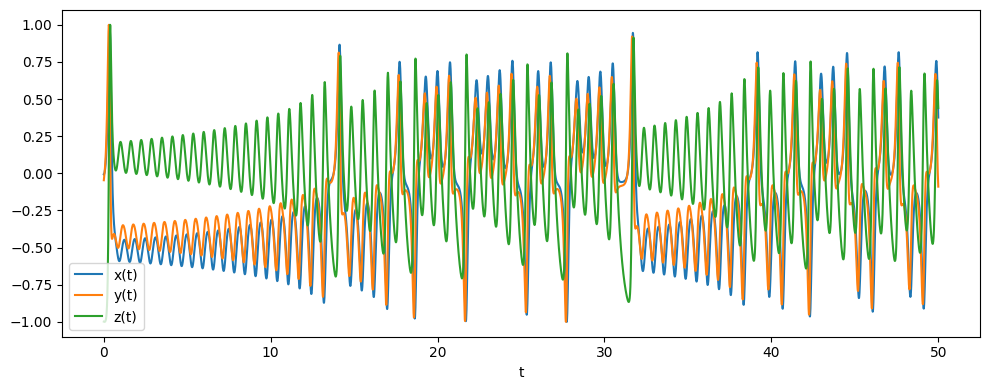

In [15]:
plt.figure(figsize=(10, 4))
plt.plot(df.index, df["x"], label="x(t)")
plt.plot(df.index, df["y"], label="y(t)")
plt.plot(df.index, df["z"], label="z(t)")
plt.xlabel("t"), plt.legend(), plt.tight_layout()
plt.show()


## ŒïŒªŒ∫œÖœÉœÑŒÆœÇ (¬´œÄŒµœÑŒ±ŒªŒøœçŒ¥Œ±¬ª)
### ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒµŒØ œÑœÅŒπœÉŒ¥ŒπŒ¨œÉœÑŒ±œÑŒø Œ¥ŒπŒ¨Œ≥œÅŒ±ŒºŒºŒ± œÑŒ∑œÇ œÑœÅŒøœáŒπŒ¨œÇ œÑŒøœÖ œÉœÖœÉœÑŒÆŒºŒ±œÑŒøœÇ Lorenz œÉœÑŒøŒΩ œáœéœÅŒø œÑœâŒΩ ŒºŒµœÑŒ±Œ≤ŒªŒ∑œÑœéŒΩ (x, y, z) ‚Äî Œ¥Œ∑ŒªŒ±Œ¥ŒÆ ŒøœÄœÑŒπŒ∫ŒøœÄŒøŒπŒµŒØ œÑŒø Œ¥ŒπŒ¨œÉŒ∑ŒºŒø ‚ÄúLorenz attractor‚Äù.

<function matplotlib.pyplot.show(close=None, block=None)>

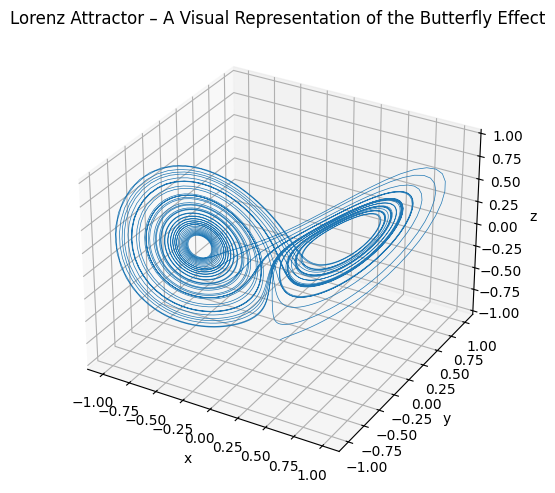

In [16]:
from mpl_toolkits.mplot3d import Axes3D  # ŒºœåŒΩŒø Œ≥ŒπŒ± ŒΩŒ± ŒµŒΩŒµœÅŒ≥ŒøœÄŒøŒπŒ∑Œ∏ŒµŒØ œÑŒø 3-D
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(projection="3d")
ax.plot(x, y, z, linewidth=0.5)
ax.set_xlabel("x"), ax.set_ylabel("y"), ax.set_zlabel("z")
ax.set_title("Lorenz Attractor ‚Äì A Visual Representation of the Butterfly Effect")
plt.tight_layout(); plt.show



# ŒîŒøŒºŒÆ Sliding Window Multi-Step Forecasting
## Œ£Œ∫ŒøœÄœåœÇ: ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒµŒØœÇ œÄŒøŒªŒªŒ¨ training samples Œ±œÄœå œÑŒ∑ œáœÅŒøŒΩŒøœÉŒµŒπœÅŒ¨ x(t)
#         ŒìŒπŒ± Œ∫Œ¨Œ∏Œµ sample: Input: 50 œÑŒπŒºŒ≠œÇ (ŒπœÉœÑŒøœÅŒπŒ∫œå) , Target: ŒøŒπ ŒµœÄœåŒºŒµŒΩŒµœÇ 10 œÑŒπŒºŒ≠œÇ



### X_ins: œÑŒ± œÄŒ±œÅŒ±Œ∏œÖœÅŒπŒ∫Œ¨ inputs (ŒπœÉœÑŒøœÅŒπŒ∫œå 50 œÑŒπŒºœéŒΩ)

### y_targets: œÑŒ± Œ±ŒΩœÑŒØœÉœÑŒøŒπœáŒ± multi-step targets (10 œÑŒπŒºŒ≠œÇ)

### prices: Œ∑ œÑŒµŒªŒµœÖœÑŒ±ŒØŒ± œÑŒπŒºŒÆ Œ∫Œ¨Œ∏Œµ ŒµŒπœÉœåŒ¥ŒøœÖ (œáœÅŒÆœÉŒπŒºŒ∑ Œ±ŒΩ Œ∫Œ¨ŒΩŒµŒπœÇ normalization)




In [17]:
y_targets = list()     # œÑŒ± Œ±ŒΩœÑŒØœÉœÑŒøŒπœáŒ± multi-step targets (10 œÑŒπŒºŒ≠œÇ)
X_ins = list()         # œÑŒ± inputs (ŒπœÉœÑŒøœÅŒπŒ∫œå 50 œÑŒπŒºœéŒΩ) 
prices = list()        # Œ∑ œÑŒµŒªŒµœÖœÑŒ±ŒØŒ± œÑŒπŒºŒÆ Œ∫Œ¨Œ∏Œµ ŒµŒπœÉœåŒ¥ŒøœÖ (œáœÅŒÆœÉŒπŒºŒ∑ Œ±ŒΩ Œ∫Œ¨ŒΩŒµŒπœÇ normalization)



# Œ†Œ±œÅŒ¨ŒºŒµœÑœÅŒøŒπ
input_window = 50
forecast_horizon = 10

for i in range(len(df)):
    end = i + input_window + forecast_horizon
    if end > len(df):
        break  # ŒëŒΩ Œ¥ŒµŒΩ Œ≠œáŒøœÖŒºŒµ Œ±œÅŒ∫ŒµœÑŒ¨ Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩŒ± Œ≥ŒπŒ± full œÄŒ±œÅŒ¨Œ∏œÖœÅŒø

    # ŒüŒªœåŒ∫ŒªŒ∑œÅŒø œÑŒø œÄŒ±œÅŒ¨Œ∏œÖœÅŒø: input + forecast
    seq_full = df['x'].iloc[i:end].reset_index(drop=True)

    # ŒïŒØœÉŒøŒ¥ŒøœÇ: ŒøŒπ œÄœÅœéœÑŒµœÇ 50 œÑŒπŒºŒ≠œÇ
    seq_input = seq_full[:input_window]
    X_ins.append(np.round(np.array(seq_input), 5))

    # Œ£œÑœåœáŒøœÇ: ŒøŒπ ŒµœÄœåŒºŒµŒΩŒµœÇ 10 œÑŒπŒºŒ≠œÇ
    seq_target = seq_full[input_window:]  # Œ¥Œ∑ŒªŒ±Œ¥ŒÆ Œ∏Œ≠œÉŒµŒπœÇ 50‚Äì59
    y_targets.append(np.round(np.array(seq_target), 5))

    # ŒìŒπŒ± normalization (œÄœÅŒøŒ±ŒπœÅŒµœÑŒπŒ∫Œ¨)
    prices.append(seq_input.iloc[-1])

X = np.array(X_ins)           # shape = (n_samples, 50)
Y = np.array(y_targets)       # shape = (n_samples, 10)


### ŒëœÖœÑœå œÉœáŒµŒ¥ŒπŒ¨Œ∂ŒµŒπ œÑŒø 1œå œÄŒ±œÅŒ¨Œ∏œÖœÅŒø ŒµŒπœÉœåŒ¥ŒøœÖ (Œ¥Œ∑ŒªŒ±Œ¥ŒÆ œÑŒø 50-Œ≤Œ∑ŒºŒ±œÑŒπŒ∫œå ŒπœÉœÑŒøœÅŒπŒ∫œå œÑŒπŒºœéŒΩ Œ±œÄœå t=0 Œ≠œâœÇ t=0.49), 
### œéœÉœÑŒµ ŒΩŒ± ŒºœÄŒøœÅŒµŒØœÑŒµ ŒΩŒ± Œ¥ŒµŒØœÑŒµ œÄœéœÇ ŒºŒøŒπŒ¨Œ∂ŒµŒπ Œ≠ŒΩŒ± œÑœÖœÄŒπŒ∫œå Œ¥ŒµŒØŒ≥ŒºŒ± ŒµŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑œÇ.

In [18]:
X[0]


array([-0.00703, -0.00634, -0.00438, -0.00121,  0.00312,  0.00858,
        0.0152 ,  0.02302,  0.03211,  0.04256,  0.05447,  0.06799,
        0.08326,  0.10047,  0.11981,  0.1415 ,  0.16578,  0.19289,
        0.22309,  0.25664,  0.29378,  0.33473,  0.37964,  0.42858,
        0.48146,  0.53802,  0.59773,  0.65971,  0.72268,  0.78493,
        0.84422,  0.89795,  0.94318,  0.97696,  0.9966 ,  1.     ,
        0.98603,  0.95469,  0.90712,  0.84548,  0.77266,  0.69187,
        0.60633,  0.51899,  0.43235,  0.34838,  0.26852,  0.19373,
        0.12455,  0.06123])

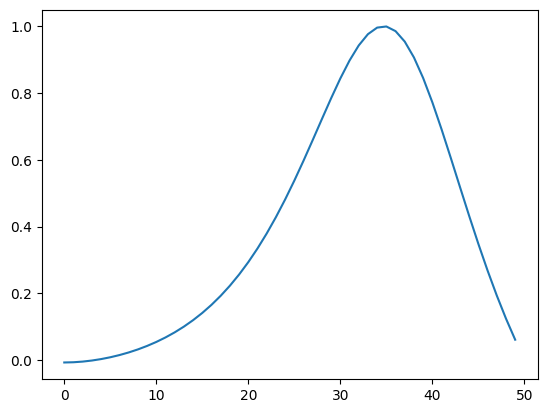

In [19]:
plt.plot(X[0])

## Œ§Œø œÄŒ±œÅŒ¨Œ∏œÖœÅŒø œÄœÅœåŒ≤ŒªŒµœàŒµŒπœÇ ŒºŒµ œÑŒπœÇ 10 œÑŒπŒºŒ≠œÇ œÉœÑŒøŒΩ ŒºŒ≠ŒªŒøŒΩ

In [20]:
Y[0]

array([ 0.00373, -0.04811, -0.09462, -0.13618, -0.1732 , -0.20611,
       -0.23535, -0.26134, -0.28448, -0.30512])

## ŒîŒπŒ±œáœâœÅŒπœÉŒºœåœÇ œÉŒµ training set & test set
### Œ§Œø œÄœÅœéœÑŒø 80% Œ∏Œ± œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒ∑Œ∏ŒµŒØ Œ≥ŒπŒ± œÑŒø training set


In [21]:
#ŒîŒπŒ±œáœâœÅŒπœÉŒºœåœÇ œÉŒµ training set Œ∫Œ±Œπ test set
ts = round(len(X)*0.8)
#inputs
# œÑŒø œÄœÅœéœÑŒø 80% train set Œ∫Œ±Œπ œÑŒø œÖœÄœåŒªŒøŒπœÄŒø test set
train_set = X[:ts]
test_set = X[ts:]
#outputs
#
y_train = Y[:ts]
y_test = Y[ts:]

# Œø ŒªœåŒ≥ŒøœÇ œÄŒøœÖ œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒøœçŒºŒµ numpy vectors ŒµŒØŒΩŒ±Œπ Œ≥ŒπŒ±œÑŒØ œÄŒøŒªŒªŒ≠œÇ Œ≤ŒπŒ≤ŒªŒπŒøŒÆŒ∫ŒµœÇ ML œÑŒ± œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒøœçŒΩ
y_train = np.array(y_train)
y_test = np.array(y_test)

## ŒïŒπœÉŒ¨Œ≥ŒøœÖŒºŒµ Œ∫Œ¨œÄŒøŒπŒµœÇ Œ≤ŒπŒ≤ŒªŒπŒøŒ∏ŒÆŒ∫ŒµœÇ
### 1) from sklearn.linear_model import Ridge
### Œó œÄŒ±ŒªŒπŒΩŒ¥œÅœåŒºŒ∑œÉŒ∑ Ridge Œ∏Œ± ŒµŒØŒΩŒ±Œπ œÑŒø read‚Äêout layer: Œ≠ŒΩŒ± Œ≥œÅŒ±ŒºŒºŒπŒ∫œå ŒºŒøŒΩœÑŒ≠ŒªŒø ŒºŒµ L‚ÇÇ Œ∫Œ±ŒΩŒøŒΩŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑,
### œÄŒøœÖ ŒºŒ±Œ∏Œ±ŒØŒΩŒµŒπ ŒΩŒ± œáŒ±œÅœÑŒøŒ≥œÅŒ±œÜŒµŒØ œÑŒπœÇ Œ∫Œ±œÑŒ±œÉœÑŒ¨œÉŒµŒπœÇ œÑŒøœÖ reservoir œÉœÑŒπœÇ œÑŒπŒºŒ≠œÇ‚ÄêœÉœÑœåœáŒøœÖœÇ.
### 2) from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
### Œ§Œø GridSearchCV ŒµŒ∫œÑŒµŒªŒµŒØ ŒµŒæŒ±ŒΩœÑŒªŒ∑œÑŒπŒ∫ŒÆ Œ±ŒΩŒ±Œ∂ŒÆœÑŒ∑œÉŒ∑ œÉŒµ œÄŒªŒ≠Œ≥ŒºŒ± œÖœÄŒµœÅœÄŒ±œÅŒ±ŒºŒ≠œÑœÅœâŒΩ
### (œÄ.œá. Œ¥ŒπŒ±œÜŒøœÅŒµœÑŒπŒ∫Œ¨ spectral_radius, leakage Œ∫.ŒªœÄ.), œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπœéŒΩœÑŒ±œÇ cross‚Äêvalidation
### Œ≥ŒπŒ± ŒΩŒ± ŒµœÄŒπŒªŒ≠ŒæŒµŒπ œÑŒøŒΩ Œ∫Œ±ŒªœçœÑŒµœÅŒø œÉœÖŒΩŒ¥œÖŒ±œÉŒºœå.
### Œ§Œø TimeSeriesSplit ŒµŒØŒΩŒ±Œπ Œ∫Œ±œÑŒ±ŒºŒµœÅŒπœÉœÑŒÆœÇ cross‚Äêvalidation œÄŒøœÖ Œ¥ŒπŒ±œÑŒ∑œÅŒµŒØ œÑŒ∑ œáœÅŒøŒΩŒøŒªŒøŒ≥ŒπŒ∫ŒÆ œÉŒµŒπœÅŒ¨
### (œáœâœÅŒØœÇ œÑœÖœáŒ±ŒπŒøœÄŒøŒØŒ∑œÉŒ∑), œÄŒ±œÅŒ≠œáŒøŒΩœÑŒ±œÇ œÉœâœÉœÑŒ¨ train/test folds Œ≥ŒπŒ± œáœÅŒøŒΩŒøœÉŒµŒπœÅŒ≠œÇ.
### 3) from sklearn.metrics import make_scorer, mean_squared_error
### Œ§Œø mean_squared_error ŒµŒØŒΩŒ±Œπ Œ∑ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ Œ∫œåœÉœÑŒøœÖœÇ (loss) œÄŒøœÖ Œ∏Œ± ŒµŒªŒ±œáŒπœÉœÑŒøœÄŒøŒπŒÆœÉŒµœÑŒµ.
### Œ§Œø make_scorer(mean_squared_error, greater_is_better=False) œÑŒø ‚ÄúœÑœÖŒªŒØŒ≥ŒµŒπ‚Äù
### œéœÉœÑŒµ ŒΩŒ± ŒºœÄŒøœÅŒµŒØ ŒΩŒ± œÄŒµœÅŒ±œÉœÑŒµŒØ œÉœÑŒø GridSearchCV (Œ±œÄŒ±ŒπœÑŒµŒØ Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒø scorer).
### 4) from pyrcn.model_selection import SequentialSearchCV
### ŒàŒΩŒ±œÇ PyRCN‚Äêspecific orchestrator œÄŒøœÖ ŒµŒ∫œÑŒµŒªŒµŒØ Œ¥ŒπŒ±Œ¥ŒøœáŒπŒ∫Œ¨ Œ≤ŒÆŒºŒ±œÑŒ± tuning
### (œÄ.œá. œÄœÅœéœÑŒ± input_scaling, ŒºŒµœÑŒ¨ spectral_radius Œ∫.ŒªœÄ.), œÉœÑŒ±Œ∏ŒµœÅŒøœÄŒøŒπœéŒΩœÑŒ±œÇ 
### Œ∫Œ¨Œ∏Œµ œÜŒøœÅŒ¨ œÑŒπœÇ Œ∫Œ±ŒªœçœÑŒµœÅŒµœÇ œÄŒ±œÅŒ±ŒºŒ≠œÑœÅŒøœÖœÇ.
### 5) from pyrcn.metrics import mean_squared_error
### Œó Œ¥ŒπŒ∫ŒÆ œÑŒøœÖ Œ≠Œ∫Œ¥ŒøœÉŒ∑ œÑŒøœÖ MSE œÉœÑŒø PyRCN (ŒØŒ¥ŒπŒ± ŒºŒ±Œ∏Œ∑ŒºŒ±œÑŒπŒ∫Œ¨ Œ±ŒªŒªŒ¨ œÉœÖŒºŒ≤Œ±œÑŒÆ ŒºŒµ œÑŒø API).
### 6) from pyrcn.echo_state_network import ESNRegressor
### Œó Œ∫œçœÅŒπŒ± Œ∫ŒªŒ¨œÉŒ∑ œÄŒøœÖ œÖŒªŒøœÄŒøŒπŒµŒØ œÑŒø Echo State Network Œ≥ŒπŒ± regression.
### Œ§Œ∑ Œ¥Œ∑ŒºŒπŒøœÖœÅŒ≥ŒµŒØœÑŒµ ŒºŒµ œÑŒ± blocks InputToNode Œ∫Œ±Œπ NodeToNode, œÉœÖŒΩ Œ≠ŒΩŒ± read‚Äêout (Ridge).
### 7) from pyrcn.base.blocks import InputToNode, NodeToNode
### Œ§Œø InputToNode Œ∫Œ±Œ∏ŒøœÅŒØŒ∂ŒµŒπ œÄœéœÇ ŒøŒπ ŒµŒØœÉŒøŒ¥ŒøŒπ œÑœÅŒøœÜŒøŒ¥ŒøœÑŒøœçŒΩœÑŒ±Œπ (Œ∫Œ±Œπ Œ∫ŒªŒπŒºŒ±Œ∫œéŒΩŒøŒΩœÑŒ±Œπ)
### œÉŒµ Œ∫Œ¨Œ∏Œµ ŒΩŒµœÖœÅœéŒΩŒ± œÑŒøœÖ reservoir.
### Œ§Œø NodeToNode Œ∫Œ±Œ∏ŒøœÅŒØŒ∂ŒµŒπ œÑŒπœÇ ŒµœÉœâœÑŒµœÅŒπŒ∫Œ≠œÇ ŒµœÄŒ±ŒΩŒ±ŒªŒ∑œÄœÑŒπŒ∫Œ≠œÇ œÉœÖŒΩŒ¥Œ≠œÉŒµŒπœÇ
### (ŒºŒ≠Œ≥ŒµŒ∏ŒøœÇ, spectral radius, leakage, sparsity Œ∫.ŒªœÄ.).
### 8) from matplotlib import pyplot as plt
### ŒíŒ±œÉŒπŒ∫ŒÆ Œ≤ŒπŒ≤ŒªŒπŒøŒ∏ŒÆŒ∫Œ∑ œÉœáŒµŒ¥ŒπŒ±œÉŒºŒøœç Œ≥œÅŒ±œÜŒ∑ŒºŒ¨œÑœâŒΩ Œ≥ŒπŒ± ŒøœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑:
### Œ∫Œ±ŒºœÄœçŒªŒµœÇ Œ∫œåœÉœÑŒøœÖœÇ, œÄœÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ vs œÄœÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫Œ¨, RMSE vs œÖœÄŒµœÅœÄŒ±œÅŒ¨ŒºŒµœÑœÅŒøŒπ Œ∫.ŒªœÄ.


In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,mean_squared_error
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

from pyrcn.model_selection import SequentialSearchCV
from pyrcn.metrics import mean_squared_error
from pyrcn.echo_state_network import ESNRegressor
from pyrcn.base.blocks import InputToNode, NodeToNode
from sklearn.metrics import make_scorer,mean_squared_error

from matplotlib import pyplot as plt

## Œ¶œÑŒπŒ±œáŒΩŒøœÖŒºŒµ ŒºŒØŒ± œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ œÄŒøœÖ Œ∏Œ± œÖœÄŒøŒªŒøŒ≥ŒØŒ∂ŒµŒπ œÑŒ∑ŒΩ ŒµŒªŒ¨œáŒπœÉœÑŒ∑ œÑŒπŒºŒÆ ŒºŒ≠œÉŒ± œÉŒµ ŒºŒØŒ± ŒªŒØœÉœÑŒ± , Œ±œÖœÑœå Œ∏Œ± ŒºŒ±œÇ Œ≤ŒøŒ∑Œ∏ŒÆœÉŒµŒπ ŒΩŒ± ŒÑŒ≤œÅŒØœÉŒ∫ŒøœÖŒºŒµ œÑŒø ŒµŒªŒ¨œáŒπœÉœÑŒø rmse  

In [23]:
def find_min_with_index(lst):
    if not lst:
        raise ValueError("Œó ŒªŒØœÉœÑŒ± ŒµŒØŒΩŒ±Œπ Œ∫ŒµŒΩŒÆ")

    minimum = lst[0]
    min_index = 0

    for i in range(1, len(lst)):  # üëà i goes from 1 to len(lst) - 1
        if lst[i] < minimum:
            minimum = lst[i]
            min_index = i
    return minimum, min_index


# ŒíŒÆŒºŒ± 1: ŒëœÅœáŒπŒ∫ŒÆ œÅœçŒ∏ŒºŒπœÉŒ∑ Œ∫Œ±Œπ Grid Search œÑŒøœÖ 
## i) ŒüœÅŒØŒ∂ŒµŒπ Œ≠ŒΩŒ± Echo State Network (ESN) ŒºŒµ Œ∫Œ¨œÄŒøŒπŒµœÇ œÉœÑŒ±Œ∏ŒµœÅŒ≠œÇ Œ≤Œ±œÉŒπŒ∫Œ≠œÇ œÄŒ±œÅŒ±ŒºŒ≠œÑœÅŒøœÖœÇ
## ii) ŒüœÅŒØŒ∂ŒµŒπ Œ∫Œ±Œπ Œ≠ŒΩŒ± œÉŒµœÑ œÖœÄŒµœÅœÄŒ±œÅŒ±ŒºŒ≠œÑœÅœâŒΩ (œåœÄœâœÇ leakage, spectral_radius, input_scaling) œÄŒøœÖ Œ∏ŒµœÇ ŒΩŒ± Œ≤ŒµŒªœÑŒπœÉœÑŒøœÄŒøŒπŒÆœÉŒµŒπœÇ
## iii) ŒßœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒµŒØ Grid Search (ŒºŒ≠œÉœâ œÑŒøœÖ SequentialSearchCV) Œ≥ŒπŒ± ŒΩŒ± Œ≤œÅŒµŒπ œÑŒø Œ≤Œ≠ŒªœÑŒπœÉœÑŒø œÉœÖŒΩŒ¥œÖŒ±œÉŒºœå œÄŒ±œÅŒ±ŒºŒ≠œÑœÅœâŒΩ
## iv) ŒöŒ¨ŒΩŒµŒπ ŒµŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑ ŒºŒµ cross-validation œÉœÑŒø training set
## v) Œ§Œ≠ŒªŒøœÇ, ŒµŒºœÜŒ±ŒΩŒØŒ∂ŒµŒπ œÑŒø Œ∫Œ±ŒªœçœÑŒµœÅŒø ŒºŒøŒΩœÑŒ≠ŒªŒø œÄŒøœÖ Œ≤œÅŒ≠Œ∏Œ∑Œ∫Œµ

In [24]:
# ŒëœÄŒµŒΩŒµœÅŒ≥ŒøœÄŒøŒπŒøœçŒºŒµ œåŒªŒµœÇ œÑŒπœÇ œÄœÅŒøŒµŒπŒ¥ŒøœÄŒøŒπŒÆœÉŒµŒπœÇ Œ≥ŒπŒ± Œ∫Œ±Œ∏Œ±œÅœå output
import warnings
warnings.filterwarnings('ignore')

# initially_fixed_params: ŒªŒµŒæŒπŒ∫œå ŒºŒµ œÉœÑŒ±Œ∏ŒµœÅŒ≠œÇ œÄŒ±œÅŒ±ŒºŒ≠œÑœÅŒøœÖœÇ œÑŒøœÖ ESN Œ≥ŒπŒ± Œ±œÖœÑœå œÑŒø Œ≤ŒÆŒºŒ±.
#   hidden_layer_size=400      : Œ±œÅŒπŒ∏ŒºœåœÇ Œ∫œåŒºŒ≤œâŒΩ œÉœÑŒø reservoir
#   input_activation='identity': œáœâœÅŒØœÇ ŒºŒ∑ Œ≥œÅŒ±ŒºŒºŒπŒ∫œå ŒºŒµœÑŒ±œÉœáŒ∑ŒºŒ±œÑŒπœÉŒºœå ŒµŒπœÉœåŒ¥ŒøœÖ
#   reservoir_activation='tanh': ŒµŒΩŒµœÅŒ≥ŒøœÄŒøŒØŒ∑œÉŒ∑ ŒºŒ≠œÉŒ± œÉœÑŒø reservoir
#   bidirectional=False        : Œ∫Œ±ŒºŒØŒ± ŒøœÄŒπœÉŒ∏ŒøŒ¥œÅœåŒºŒ∑œÉŒ∑ (ŒºœåŒΩŒø œÄœÅŒøœÇ œÑŒ± ŒµŒºœÄœÅœåœÇ)
#   alpha=1e-5                 : Œ¥œçŒΩŒ±ŒºŒ∑ Œ∫Œ±ŒΩŒøŒΩŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑œÇ Ridge Œ≥ŒπŒ± œÑŒø read-out
#   k_rec=10                   : Œ∫Œ¨Œ∏Œµ Œ∫œåŒºŒ≤ŒøœÇ Œ≠œáŒµŒπ 10 ŒµœÄŒ±ŒΩŒ±ŒªŒ∑œÄœÑŒπŒ∫Œ≠œÇ œÉœÖŒΩŒ¥Œ≠œÉŒµŒπœÇ
#   random_state=42            : Œ±ŒΩŒ±œÄŒ±œÅŒ±Œ≥œâŒ≥ŒπŒºœåœÑŒ∑œÑŒ± œÑœÖœáŒ±ŒØœâŒΩ Œ≤Œ±œÅœéŒΩ
#   requires_sequence=False    : Œ¥ŒµŒΩ Œ±œÄŒ±ŒπœÑŒµŒØœÑŒ±Œπ Œ∑ ŒøŒªœåŒ∫ŒªŒ∑œÅŒ∑ Œ±Œ∫ŒøŒªŒøœÖŒ∏ŒØŒ± Œ∫Œ±œÑŒ¨ œÑŒø fit
initially_fixed_params = {
    'hidden_layer_size': 400,
    'input_activation': 'identity',
    'reservoir_activation': 'tanh',
    'bidirectional': False,
    'alpha': 1e-5,
    'k_rec': 10,
    'random_state': 42,
    'requires_sequence': False
}

# step1_esn_params: grid œÖœÄŒµœÅœÄŒ±œÅŒ±ŒºŒ≠œÑœÅœâŒΩ Œ≥ŒπŒ± œÑŒø œÄœÅœéœÑŒø tuning Œ≤ŒÆŒºŒ±
#   ‚Üí œÉœÖŒΩŒøŒªŒπŒ∫Œ¨ 2√ó2√ó2 = 8 Œ¥œÖŒΩŒ±œÑœåœÑŒ∑œÑŒµœÇ
step1_esn_params = {
    'input_scaling':  (0.1, 0.2),
    'spectral_radius': (0.1, 0.2),
    'leakage':         (0.1, 0.2)
}

# ŒúŒµœÑŒ±œÑœÅŒ≠œÄŒøœÖŒºŒµ œÑŒø MSE œÉŒµ scorer Œ≥ŒπŒ± œÑŒø GridSearchCV, œéœÉœÑŒµ ŒΩŒ± œÑŒø ŒµŒªŒ±œáŒπœÉœÑŒøœÄŒøŒπŒµŒØ
from sklearn.metrics import make_scorer, mean_squared_error
scorer = make_scorer(score_func=mean_squared_error, greater_is_better=False)

# ŒïœÄŒπœÄŒªŒ≠ŒøŒΩ kwargs Œ≥ŒπŒ± œÑŒø GridSearchCV:
#   verbose=5 : ŒµŒºœÜŒ¨ŒΩŒπœÉŒ∑ œÄœÅŒøœåŒ¥ŒøœÖ Œ±ŒΩŒ¨ fold
#   scoring=scorer : œáœÅŒÆœÉŒ∑ œÑŒøœÖ MSE scorer
#   n_jobs=1 : œÉŒµŒπœÅŒπŒ±Œ∫ŒÆ ŒµŒ∫œÑŒ≠ŒªŒµœÉŒ∑ (Œ∏Œ≠œÉŒµ -1 Œ≥ŒπŒ± œÄŒ±œÅŒ¨ŒªŒªŒ∑ŒªŒ∑)
kwargs_step1 = {
    'verbose': 5,
    'scoring': scorer,
    'n_jobs': 1
}

# ŒöŒ±Œ∏ŒøœÅŒØŒ∂ŒøœÖŒºŒµ œÑŒø Œ≤ŒÆŒºŒ± Œ±ŒΩŒ±Œ∂ŒÆœÑŒ∑œÉŒ∑œÇ:
#   ('Œ≤Œ∑ŒºŒ±', ŒúŒ≠Œ∏ŒøŒ¥ŒøœÇCV, grid œÄŒ±œÅŒ±ŒºŒ≠œÑœÅœâŒΩ, ŒµœÄŒπœÄŒªŒ≠ŒøŒΩ kwargs)
searches = [
    ('step1', GridSearchCV, step1_esn_params, kwargs_step1)
]

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒøœçŒºŒµ œÑŒø ESNRegressor ŒºŒµ Ridge read-out Œ∫Œ±Œπ œÑŒπœÇ œÉœÑŒ±Œ∏ŒµœÅŒ≠œÇ œÄŒ±œÅŒ±ŒºŒ≠œÑœÅŒøœÖœÇ
from sklearn.linear_model import Ridge
from pyrcn.echo_state_network import ESNRegressor
esn = ESNRegressor(regressor=Ridge(), **initially_fixed_params)

# ŒïŒ∫œÑŒµŒªŒøœçŒºŒµ SequentialSearchCV: 
#   1) œÄŒ±ŒØœÅŒΩŒµŒπ œÑŒø base ESN
#   2) œÑœÅŒ≠œáŒµŒπ œÑŒø 'step1' grid search (8 œÉœÖŒΩŒ¥œÖŒ±œÉŒºŒøŒØ) ŒºŒµ TimeSeriesSplit
#   3) ŒµœÄŒπŒªŒ≠Œ≥ŒµŒπ œÑŒπœÇ Œ≤Œ≠ŒªœÑŒπœÉœÑŒµœÇ input_scaling, spectral_radius, leakage
from pyrcn.model_selection import SequentialSearchCV
esn_opti = SequentialSearchCV(esn, searches=searches).fit(train_set, y_train)

# ŒïŒºœÜŒ±ŒΩŒØŒ∂ŒøœÖŒºŒµ œÑŒø Œ≤ŒµŒªœÑŒπœÉœÑŒøœÄŒøŒπŒ∑ŒºŒ≠ŒΩŒø ESN ŒºŒµ œÑŒπœÇ ŒµœÄŒπŒªŒµŒ≥ŒºŒ≠ŒΩŒµœÇ œÄŒ±œÅŒ±ŒºŒ≠œÑœÅŒøœÖœÇ
print(esn_opti)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END input_scaling=0.1, leakage=0.1, spectral_radius=0.1;, score=-0.011 total time=   0.5s
[CV 2/5] END input_scaling=0.1, leakage=0.1, spectral_radius=0.1;, score=-0.053 total time=   0.4s
[CV 3/5] END input_scaling=0.1, leakage=0.1, spectral_radius=0.1;, score=-0.005 total time=   0.4s
[CV 4/5] END input_scaling=0.1, leakage=0.1, spectral_radius=0.1;, score=-0.009 total time=   0.4s
[CV 5/5] END input_scaling=0.1, leakage=0.1, spectral_radius=0.1;, score=-0.030 total time=   0.6s
[CV 1/5] END input_scaling=0.1, leakage=0.1, spectral_radius=0.2;, score=-0.176 total time=   0.4s
[CV 2/5] END input_scaling=0.1, leakage=0.1, spectral_radius=0.2;, score=-0.095 total time=   0.3s
[CV 3/5] END input_scaling=0.1, leakage=0.1, spectral_radius=0.2;, score=-0.257 total time=   0.4s
[CV 4/5] END input_scaling=0.1, leakage=0.1, spectral_radius=0.2;, score=-0.061 total time=   0.4s
[CV 5/5] END input_scaling=0.1, leakage=0.1, spec

## ŒîŒøŒ∫ŒπŒºŒ¨Œ∂ŒøœÖŒºŒµ Œ¥ŒπŒ¨œÜŒøœÅŒµœÇ œÑŒπŒºŒ≠œÇ Œ≥ŒπŒ± œÑŒø Input Scaling Œ≥ŒπŒ± ŒΩŒ± Œ≤œÅŒøœçŒºŒµ œÑŒ∑ŒΩ Œ≤Œ≠ŒªœÑŒπœÉœÑŒ∑

In [26]:
## ŒöŒ±Œ∏ŒøœÅŒØŒ∂ŒøœÖŒºŒµ œÑŒ∑ŒΩ ŒªŒØœÉœÑŒ± œÖœÄŒøœàŒÆœÜŒπœâŒΩ input_scaling œÑŒπŒºœéŒΩ
in_scaling = [0.1,0.2,0.3,0.4]

In [27]:
# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒøœçŒºŒµ ŒºŒπŒ± ŒªŒØœÉœÑŒ± Œ≥ŒπŒ± ŒΩŒ± Œ±œÄŒøŒ∏Œ∑Œ∫ŒµœçœÉŒøœÖŒºŒµ œÑŒ± RMSE Œ≥ŒπŒ± Œ∫Œ¨Œ∏Œµ input_scaling
rmses = list()
# ŒíœÅœåœáŒøœÇ œÄŒ¨ŒΩœâ œÉŒµ œåŒªŒµœÇ œÑŒπœÇ œÑŒπŒºŒ≠œÇ œÑŒøœÖ in_scaling
for i in range(len(in_scaling)):
    in_s = in_scaling[i]  # œÑœÅŒ≠œáŒøœÖœÉŒ± œÑŒπŒºŒÆ input_scaling

    # ŒüœÅŒØŒ∂ŒøœÖŒºŒµ œÑŒø ŒºœÄŒªŒøŒ∫ œÄŒøœÖ œÑœÅŒøœÜŒøŒ¥ŒøœÑŒµŒØ œÑŒø reservoir ŒºŒµ ŒµŒØœÉŒøŒ¥Œø

    base_input_to_nodes = InputToNode(
        hidden_layer_size=40,        # œÄŒªŒÆŒ∏ŒøœÇ Œ∫œåŒºŒ≤œâŒΩ reservoir
        input_activation='identity',  # œáœâœÅŒØœÇ ŒºŒ∑ Œ≥œÅŒ±ŒºŒºŒπŒ∫ŒÆ ŒµŒΩŒµœÅŒ≥ŒøœÄŒøŒØŒ∑œÉŒ∑ œÉœÑŒ∑ŒΩ ŒµŒØœÉŒøŒ¥Œø
        k_in=1,                       # Œ∫Œ¨Œ∏Œµ ŒµŒØœÉŒøŒ¥ŒøœÇ œÉœÖŒΩŒ¥Œ≠ŒµœÑŒ±Œπ ŒºŒµ Œ∫Œ¨Œ∏Œµ Œ∫œåŒºŒ≤Œø
        input_scaling=in_s,           # Œ∫ŒªŒπŒºŒ¨Œ∫œâœÉŒ∑ ŒµŒπœÉœåŒ¥ŒøœÖ
        bias_scaling=0.0              # œáœâœÅŒØœÇ bias
    )
    
     # ŒüœÅŒØŒ∂ŒøœÖŒºŒµ œÑŒπœÇ ŒµœÄŒ±ŒΩŒ±ŒªŒ∑œÄœÑŒπŒ∫Œ≠œÇ œÉœÖŒΩŒ¥Œ≠œÉŒµŒπœÇ œÑŒøœÖ reservoir
    base_nodes_to_nodes = NodeToNode(
        hidden_layer_size=40, # ŒØŒ¥ŒπŒø œÄŒªŒÆŒ∏ŒøœÇ Œ∫œåŒºŒ≤œâŒΩ
        spectral_radius=0.1,   # œÉœÑŒ±Œ∏ŒµœÅŒÆ œÜŒ±œÉŒºŒ±œÑŒπŒ∫ŒÆ Œ±Œ∫œÑŒØŒΩŒ±
        leakage=0.2,           # œÉœÑŒ±Œ∏ŒµœÅœåœÇ œÅœÖŒ∏ŒºœåœÇ Œ¥ŒπŒ±œÅœÅŒøŒÆœÇ
        k_rec=10               # Œ∫Œ¨Œ∏Œµ Œ∫œåŒºŒ≤ŒøœÇ œÉœÖŒΩŒ¥Œ≠ŒµœÑŒ±Œπ ŒºŒµ 10 œÑœÖœáŒ±ŒØŒøœÖœÇ
    )
     
    # ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒøœçŒºŒµ œÑŒø ESN ŒºŒµ Ridge read-out
    esn = ESNRegressor(
        input_to_node=base_input_to_nodes,
        node_to_node=base_nodes_to_nodes,
        regressor=Ridge(alpha=1e-8),
        n_readout_inits=50  #n_readout_inits=50 œÄŒµœÑŒ±ŒµŒπ œÑŒ± œÄœÅœâœÑŒ± 50 Œ≤Œ∑ŒºŒ±œÑŒ± Œ≥ŒπŒ± ŒΩŒ± œÉœÑŒ±Œ∏ŒµœÅŒøœÄŒøŒπŒ∑Œ∏ŒµŒØ œÑŒø Reservoir
    )
    
    # ŒïŒ∫œÄŒ±ŒπŒ¥ŒµœçŒøœÖŒºŒµ œÑŒø ESN œÄŒ¨ŒΩœâ œÉœÑŒø training set
    esn.fit(train_set, y_train)
    
    # Œ†Œ±œÅŒ¨Œ≥ŒøœÖŒºŒµ œÄœÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ Œ≥ŒπŒ± œÑŒø ŒØŒ¥ŒπŒø training set
    predictions = esn.predict(train_set)
    
    # Œ•œÄŒøŒªŒøŒ≥ŒØŒ∂ŒøœÖŒºŒµ œÑŒø MSE Œ∫Œ±Œπ Œ≠œÄŒµŒπœÑŒ± œÑŒø RMSE
    MSE = mean_squared_error(predictions,y_train)
    rmse = math.sqrt(MSE)
        
    # ŒïŒ∫œÑœÖœÄœéŒΩŒøœÖŒºŒµ Œ∫Œ±Œπ Œ±œÄŒøŒ∏Œ∑Œ∫ŒµœçŒøœÖŒºŒµ œÑŒø RMSE
    print(rmse)
    rmses.append(rmse)

   

0.015323460602408216
0.01561806897056922
0.015336486436745428
0.018261774382887244


## ŒßœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒøœçŒºŒµ œÑŒ∑ŒΩ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ œÄŒøœÖ Œ≤œÅŒØœÉŒ∫ŒµŒπ œÑŒ∑ŒΩ œÑŒπŒºŒÆ ŒºŒµ œÑŒø ŒµŒªŒ¨œáŒπœÉœÑŒø œÉœÜŒ¨ŒªŒºŒ± Œ∫Œ±Œπ œÑŒøŒΩ index œÑŒ∑œÇ  

In [28]:
minimum, index = find_min_with_index(rmses)

# Œ§œéœÅŒ± Œ≠œáŒµŒπœÇ Œ∫Œ±Œπ œÑŒ∑ŒΩ œÑŒπŒºŒÆ Œ∫Œ±Œπ œÑŒø index Œ≠Œæœâ Œ±œÄœå œÑŒ∑ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑
print("Œó ŒµŒªŒ¨œáŒπœÉœÑŒ∑ œÑŒπŒºŒÆ ŒµŒØŒΩŒ±Œπ:", minimum)
print("Œó Œ∏Œ≠œÉŒ∑ œÑŒ∑œÇ ŒµŒØŒΩŒ±Œπ:", index)
print("Œ§Œø in_scaling œÄŒøœÖ Œ±ŒΩœÑŒπœÉœÑŒøŒπœáŒµŒØ ŒµŒØŒΩŒ±Œπ:", in_scaling[index])

Œó ŒµŒªŒ¨œáŒπœÉœÑŒ∑ œÑŒπŒºŒÆ ŒµŒØŒΩŒ±Œπ: 0.015323460602408216
Œó Œ∏Œ≠œÉŒ∑ œÑŒ∑œÇ ŒµŒØŒΩŒ±Œπ: 0
Œ§Œø in_scaling œÄŒøœÖ Œ±ŒΩœÑŒπœÉœÑŒøŒπœáŒµŒØ ŒµŒØŒΩŒ±Œπ: 0.1


## Œ¶œÑŒπŒ¨œáŒΩŒøœÖŒºŒµ Œ≠ŒΩŒ± Œ¥ŒπŒ¨Œ≥œÅŒ±ŒºŒºŒ± œÄŒøœÖ Œ±œÄŒµŒπŒ∫ŒøŒΩŒØŒ∂ŒµŒπ œÄœâœÇ œÉœÖŒºœÄŒµœÅŒπœÜŒ≠œÅŒµœÑŒ±Œπ œÑŒø rmse Œ≥ŒπŒ± œÑŒπœÇ Œ¥ŒØŒ±œÜŒøœÅŒµœÇ œÑŒπŒºŒ≠œÇ œÑŒøœÖ input scaling

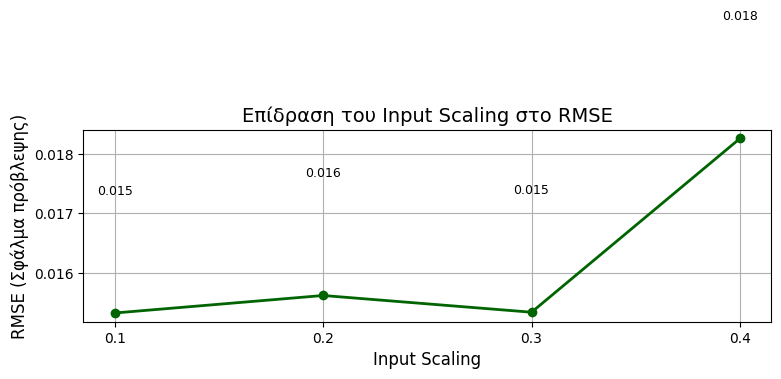

In [29]:
import matplotlib.pyplot as plt

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± Œ≥œÅŒ±œÜŒÆŒºŒ±œÑŒøœÇ
plt.figure(figsize=(8, 5))
plt.plot(in_scaling, rmses, marker='o', linestyle='-', linewidth=2, color='darkgreen')

# Œ§ŒØœÑŒªŒøœÇ Œ∫Œ±Œπ Œ¨ŒæŒøŒΩŒµœÇ
plt.title("ŒïœÄŒØŒ¥œÅŒ±œÉŒ∑ œÑŒøœÖ Input Scaling œÉœÑŒø RMSE", fontsize=14)
plt.xlabel("Input Scaling", fontsize=12)
plt.ylabel("RMSE (Œ£œÜŒ¨ŒªŒºŒ± œÄœÅœåŒ≤ŒªŒµœàŒ∑œÇ)", fontsize=12)

# Œ†œÅŒøœÉŒ∏ŒÆŒ∫Œ∑ œÑŒπŒºœéŒΩ RMSE œÄŒ¨ŒΩœâ Œ±œÄœå Œ∫Œ¨Œ∏Œµ œÉŒ∑ŒºŒµŒØŒø
for i, rmse in enumerate(rmses):
    plt.text(in_scaling[i], rmse + 0.002, f"{rmse:.3f}", ha='center', fontsize=9)

# Styling
plt.grid(True)
plt.xticks(in_scaling)
plt.tight_layout()
plt.show()


## ŒîŒøŒ∫ŒπŒºŒ¨Œ∂ŒøœÖŒºŒµ Œ¥ŒπŒ¨œÜŒøœÅŒµœÇ œÑŒπŒºŒ≠œÇ Œ≥ŒπŒ± œÑŒøŒΩ Œ±œÅŒπŒ∏Œºœå œÑœâŒΩ nodes Œ≥ŒπŒ± ŒΩŒ± Œ≤œÅŒøœçŒºŒµ œÑŒ∑ŒΩ Œ≤Œ≠ŒªœÑŒπœÉœÑŒ∑ 


In [30]:
## ŒöŒ±Œ∏ŒøœÅŒØŒ∂ŒøœÖŒºŒµ œÑŒ∑ŒΩ ŒªŒØœÉœÑŒ± œÖœÄŒøœàŒÆœÜŒπœâŒΩ input_scaling œÑŒπŒºœéŒΩ
nodes = [30,40,50,60,70,80,90,100]

## ŒòŒ≠ŒªŒøœÖŒºŒµ ŒΩŒ± Œ¥ŒøœçŒºŒµ œÄœéœÇ Œ∑ Œ±œÄœåŒ¥ŒøœÉŒ∑ œÑŒøœÖ ESN (ŒºŒµœÑœÅŒøœçŒºŒµŒΩŒ∑ œâœÇ RMSE œÉœÑŒø training set) Œ±ŒªŒªŒ¨Œ∂ŒµŒπ Œ∫Œ±Œ∏œéœÇ Œ±ŒªŒªŒ¨Œ∂ŒøœÖŒºŒµ œÑŒø œÄŒªŒÆŒ∏ŒøœÇ œÑœâŒΩ ŒΩŒµœÖœÅœéŒΩœâŒΩ (nodes) œÉœÑŒø ŒµœÉœâœÑŒµœÅŒπŒ∫œå reservoir.

## ŒõŒπŒ≥œåœÑŒµœÅŒøŒπ Œ∫œåŒºŒ≤ŒøŒπ ‚Üí ŒºŒπŒ∫œÅœåœÑŒµœÅŒ∑ œáœâœÅŒ∑œÑŒπŒ∫œåœÑŒ∑œÑŒ± ŒºŒΩŒÆŒºŒ∑œÇ, ŒªŒπŒ≥œåœÑŒµœÅŒø œÄŒøŒªœçœÄŒªŒøŒ∫Œø ŒºŒøŒΩœÑŒ≠ŒªŒø

## Œ†ŒµœÅŒπœÉœÉœåœÑŒµœÅŒøŒπ Œ∫œåŒºŒ≤ŒøŒπ ‚Üí œÄŒµœÅŒπœÉœÉœåœÑŒµœÅŒ∑ œáœâœÅŒ∑œÑŒπŒ∫œåœÑŒ∑œÑŒ±, Œ±ŒªŒªŒ¨ Œ∫Œ±Œπ Œ∫ŒØŒΩŒ¥œÖŒΩŒøœÇ œÖœÄŒµœÅŒµŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑œÇ ŒÆ ŒºŒµŒ≥Œ±ŒªœçœÑŒµœÅŒø Œ∫œåœÉœÑŒøœÇ œÖœÄŒøŒªŒøŒ≥ŒπœÉŒºŒøœç

In [31]:

# ŒïŒ¥œé Œ∏Œ± Œ±œÄŒøŒ∏Œ∑Œ∫ŒµœçœÉŒøœÖŒºŒµ œÑŒ± RMSE Œ≥ŒπŒ± Œ∫Œ¨Œ∏Œµ ŒºŒ≠Œ≥ŒµŒ∏ŒøœÇ
rmses = []

# ŒíœÅœåœáŒøœÇ œÄŒ¨ŒΩœâ œÉŒµ Œ∫Œ¨Œ∏Œµ Œ±œÅŒπŒ∏Œºœå Œ∫œåŒºŒ≤œâŒΩ
for i in range(len(nodes)):
    n_nodes = nodes[i]  # œÑœÅŒ≠œáŒøœÖœÉŒ± œÑŒπŒºŒÆ hidden_layer_size

    # 1) ŒüœÅŒπœÉŒºœåœÇ œÑŒøœÖ ŒºœÄŒªŒøŒ∫ ŒµŒπœÉœåŒ¥ŒøœÖ ŒºŒµ n_nodes ŒΩŒµœÖœÅœéŒΩŒµœÇ
    base_input_to_nodes = InputToNode(
        hidden_layer_size=n_nodes,       # œÄŒªŒÆŒ∏ŒøœÇ ŒΩŒµœÖœÅœéŒΩœâŒΩ
        input_activation='identity',     # œáœâœÅŒØœÇ ŒºŒ∑-Œ≥œÅŒ±ŒºŒºŒπŒ∫œåœÑŒ∑œÑŒ± œÉœÑŒ∑ŒΩ ŒµŒØœÉŒøŒ¥Œø
        k_in=1,                          # œÄŒªŒÆœÅŒ∑œÇ œÉœçŒΩŒ¥ŒµœÉŒ∑ input ‚Üí Œ∫Œ¨Œ∏Œµ ŒΩŒµœÖœÅœéŒΩŒ±
        input_scaling=0.1,               # œÉœÑŒ±Œ∏ŒµœÅŒÆ Œ∫ŒªŒπŒºŒ¨Œ∫œâœÉŒ∑ ŒµŒπœÉœåŒ¥ŒøœÖ
        bias_scaling=0.0                 # œáœâœÅŒØœÇ bias
    )

    # 2) ŒüœÅŒπœÉŒºœåœÇ œÑŒøœÖ ŒºœÄŒªŒøŒ∫ ŒµœÄŒ±ŒΩŒ±ŒªŒ∑œÄœÑŒπŒ∫œéŒΩ œÉœÖŒΩŒ¥Œ≠œÉŒµœâŒΩ (reservoir)
    base_nodes_to_nodes = NodeToNode(
        hidden_layer_size=n_nodes,  # ŒØŒ¥ŒπŒø œÄŒªŒÆŒ∏ŒøœÇ ŒΩŒµœÖœÅœéŒΩœâŒΩ
        spectral_radius=0.1,        # œÉœÑŒ±Œ∏ŒµœÅŒÆ œÜŒ±œÉŒºŒ±œÑŒπŒ∫ŒÆ Œ±Œ∫œÑŒØŒΩŒ±
        leakage=0.2,                # œÉœÑŒ±Œ∏ŒµœÅŒÆ Œ¥ŒπŒ±œÅœÅŒøŒÆ ŒºŒΩŒÆŒºŒ∑œÇ
        k_rec=10,                   # 10 œÑœÖœáŒ±ŒØŒµœÇ ŒµœÄŒ±ŒΩŒ±ŒªŒ∑œÄœÑŒπŒ∫Œ≠œÇ œÉœÖŒΩŒ¥Œ≠œÉŒµŒπœÇ Œ±ŒΩŒ¨ ŒΩŒµœÖœÅœéŒΩŒ±
              
    )

    # 3) ŒöŒ±œÑŒ±œÉŒ∫ŒµœÖŒÆ ESNRegressor ŒºŒµ Ridge read‚Äêout
    esn = ESNRegressor(
        input_to_node=base_input_to_nodes,
        node_to_node=base_nodes_to_nodes,
        regressor=Ridge(alpha=1e-8)  # œÄŒøŒªœç ŒµŒªŒ±œÜœÅŒπŒ¨ Œ∫Œ±ŒΩŒøŒΩŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑
    )

    # 4) ŒïŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑ œÑŒøœÖ ESN œÉœÑŒø training set
    esn.fit(train_set, y_train)

    # 5) Œ†œÅœåŒ≤ŒªŒµœàŒ∑ œÄŒ¨ŒΩœâ œÉœÑŒø ŒØŒ¥ŒπŒø training set
    predictions = esn.predict(train_set)

    # 6) Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ MSE Œ∫Œ±Œπ RMSE
    MSE = mean_squared_error(predictions, y_train)
    rmse = math.sqrt(MSE)

    # 7) ŒïŒºœÜŒ¨ŒΩŒπœÉŒ∑ Œ∫Œ±Œπ Œ±œÄŒøŒ∏ŒÆŒ∫ŒµœÖœÉŒ∑ œÑŒøœÖ Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒøœÇ
    print(f"n_nodes={n_nodes} ‚Üí RMSE={rmse:.20f}")
    rmses.append(rmse)


n_nodes=30 ‚Üí RMSE=0.03399932911602290830
n_nodes=40 ‚Üí RMSE=0.02094298511804930374
n_nodes=50 ‚Üí RMSE=0.01463212985071131456
n_nodes=60 ‚Üí RMSE=0.02648527369978751975
n_nodes=70 ‚Üí RMSE=0.01266520869875814234
n_nodes=80 ‚Üí RMSE=0.01416215720201095991
n_nodes=90 ‚Üí RMSE=0.01148218059770491836
n_nodes=100 ‚Üí RMSE=0.01046194215748363562


## ŒßœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒøœçŒºŒµ œÑŒ∑ŒΩ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ œÄŒøœÖ Œ≤œÅŒØœÉŒ∫ŒµŒπ œÑŒ∑ŒΩ œÑŒπŒºŒÆ ŒºŒµ œÑŒø ŒµŒªŒ¨œáŒπœÉœÑŒø œÉœÜŒ¨ŒªŒºŒ± Œ∫Œ±Œπ œÑŒøŒΩ index œÑŒ∑œÇ  

In [32]:
minimum, index = find_min_with_index(rmses)

# Œ§œéœÅŒ± Œ≠œáŒµŒπœÇ Œ∫Œ±Œπ œÑŒ∑ŒΩ œÑŒπŒºŒÆ Œ∫Œ±Œπ œÑŒø index Œ≠Œæœâ Œ±œÄœå œÑŒ∑ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑
print("Œó ŒµŒªŒ¨œáŒπœÉœÑŒ∑ œÑŒπŒºŒÆ ŒµŒØŒΩŒ±Œπ:", minimum)
print("Œó Œ∏Œ≠œÉŒ∑ œÑŒ∑œÇ ŒµŒØŒΩŒ±Œπ:", index)
print("Œ§Œ± nodes œÄŒøœÖ Œ±ŒΩœÑŒπœÉœÑŒøŒπœáŒµŒØ ŒµŒØŒΩŒ±Œπ:", nodes[index])

Œó ŒµŒªŒ¨œáŒπœÉœÑŒ∑ œÑŒπŒºŒÆ ŒµŒØŒΩŒ±Œπ: 0.010461942157483636
Œó Œ∏Œ≠œÉŒ∑ œÑŒ∑œÇ ŒµŒØŒΩŒ±Œπ: 7
Œ§Œ± nodes œÄŒøœÖ Œ±ŒΩœÑŒπœÉœÑŒøŒπœáŒµŒØ ŒµŒØŒΩŒ±Œπ: 100


## ŒìœÅŒ¨œÜŒ∑ŒºŒ± œÄŒøœÖ Œ¥ŒµŒØœáŒΩŒµŒπ œÄŒøœÉŒø ŒºŒµœÑŒ±Œ≤Œ¨ŒªŒµœÑŒ±Œπ œÑŒø œÉœÜŒ¨ŒªŒºŒ± ŒºŒµ Œ≤Œ¨œÉŒ∑ œÑœâŒΩ Œ±œÅŒπŒ∏ŒºœéŒΩ œÑœâŒΩ Œ∫œåŒºŒ≤œâŒΩ œÄŒøœÖ ŒµœÄŒπŒªŒ≠œáŒ∏Œ∑Œ∫Œµ

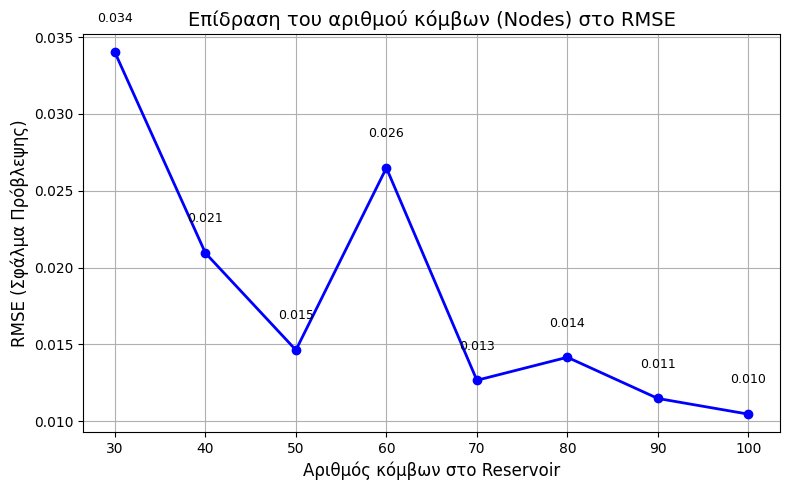

In [33]:


plt.figure(figsize=(8, 5))  # ŒöŒ±Œ∏Œ±œÅœå ŒºŒ≠Œ≥ŒµŒ∏ŒøœÇ Œ≥ŒπŒ± œÄŒ±œÅŒøœÖœÉŒØŒ±œÉŒ∑
plt.plot(nodes, rmses, marker='o', linestyle='-', linewidth=2, color='blue')

# Œ†œÅŒøœÉŒ∏ŒÆŒ∫Œ∑ œÑŒØœÑŒªŒøœÖ Œ∫Œ±Œπ Œ±ŒæœåŒΩœâŒΩ
plt.title("ŒïœÄŒØŒ¥œÅŒ±œÉŒ∑ œÑŒøœÖ Œ±œÅŒπŒ∏ŒºŒøœç Œ∫œåŒºŒ≤œâŒΩ (Nodes) œÉœÑŒø RMSE", fontsize=14)
plt.xlabel("ŒëœÅŒπŒ∏ŒºœåœÇ Œ∫œåŒºŒ≤œâŒΩ œÉœÑŒø Reservoir", fontsize=12)
plt.ylabel("RMSE (Œ£œÜŒ¨ŒªŒºŒ± Œ†œÅœåŒ≤ŒªŒµœàŒ∑œÇ)", fontsize=12)

# Œ†œÅŒøŒ±ŒπœÅŒµœÑŒπŒ∫Œ¨: ŒµŒºœÜŒ¨ŒΩŒπœÉŒ∑ œÑŒπŒºœéŒΩ RMSE œÄŒ¨ŒΩœâ œÉœÑŒ± œÉŒ∑ŒºŒµŒØŒ±
for i, rmse in enumerate(rmses):
    plt.text(nodes[i], rmses[i] + 0.002, f"{rmse:.3f}", ha='center', fontsize=9)

plt.grid(True)
plt.xticks(nodes)
plt.tight_layout()
plt.show()


## Œ£Œµ Œ±œÖœÑœå œÑŒø Œ≤ŒÆŒºŒ± Œ¥ŒπŒ±ŒºŒøœÅœÜœéŒΩŒøœÖŒºŒµ œÑŒ∑ŒΩ Œ±œÅœáŒπœÑŒµŒ∫œÑŒøŒΩŒπŒ∫ŒÆ œÑŒøœÖ Echo State Network, Œ¥Œ∑ŒºŒπŒøœÖœÅŒ≥œéŒΩœÑŒ±œÇ: 
### Œ§Œø ŒºœÄŒªŒøŒ∫ ŒµŒπœÉœåŒ¥ŒøœÖ (InputToNode) œÄŒøœÖ œáŒ±œÅœÑŒøŒ≥œÅŒ±œÜŒµŒØ Œ∫Œ±Œπ Œ∫ŒªŒπŒºŒ±Œ∫œéŒΩŒµŒπ œÑŒπœÇ ŒµŒæœâœÑŒµœÅŒπŒ∫Œ≠œÇ œÑŒπŒºŒ≠œÇ œÉœÑŒø reservoir.
### Œ§Œø ŒµœÄŒ±ŒΩŒ±ŒªŒ∑œÄœÑŒπŒ∫œå ŒºœÄŒªŒøŒ∫ (NodeToNode) œÄŒøœÖ ŒøœÅŒØŒ∂ŒµŒπ œÑŒ∑ Œ¥œÖŒΩŒ±ŒºŒπŒ∫ŒÆ Œ∫Œ±Œπ œÑŒπœÇ ŒµœÉœâœÑŒµœÅŒπŒ∫Œ≠œÇ œÉœÖŒΩŒ¥Œ≠œÉŒµŒπœÇ œÑŒøœÖ reservoir.
### Œ§ŒøŒΩ œÑŒµŒªŒπŒ∫œå ESNRegressor, œÉœÖŒΩŒ¥œÖŒ¨Œ∂ŒøŒΩœÑŒ±œÇ œÑŒ± Œ¥œçŒø blocks ŒºŒµ Œ≠ŒΩŒ±ŒΩ Œ≥œÅŒ±ŒºŒºŒπŒ∫œå Ridge read-out, Œ≠œÑŒøŒπŒºŒø ŒΩŒ± ŒµŒ∫œÄŒ±ŒπŒ¥ŒµœÖœÑŒµŒØ.

In [34]:
# ŒüœÅŒπœÉŒºœåœÇ œÑŒøœÖ ŒºœÄŒªŒøŒ∫ ŒµŒπœÉœåŒ¥ŒøœÖ (Input ‚Üí Reservoir)
base_input_to_nodes = InputToNode(
    hidden_layer_size=100,   # reservoir ŒºŒµ 1000 ŒΩŒµœÖœÅœéŒΩŒµœÇ
    input_activation='identity',  # Œ∑ ŒµŒØœÉŒøŒ¥ŒøœÇ œÄŒµœÅŒΩŒ¨ŒµŒπ Œ±œÖœÑŒøœçœÉŒπŒ±, œáœâœÅŒØœÇ ŒºŒ∑-Œ≥œÅŒ±ŒºŒºŒπŒ∫ŒÆ ŒµŒΩŒµœÅŒ≥ŒøœÄŒøŒØŒ∑œÉŒ∑
    k_in=1,                       # Œ∫Œ¨Œ∏Œµ Œ¥ŒπŒ¨œÉœÑŒ±œÉŒ∑ ŒµŒπœÉœåŒ¥ŒøœÖ œÉœÖŒΩŒ¥Œ≠ŒµœÑŒ±Œπ ŒºŒµ Œ∫Œ¨Œ∏Œµ ŒΩŒµœÖœÅœéŒΩŒ±
    input_scaling=0.1,            # Œ∫ŒªŒπŒºŒ±Œ∫œéŒΩŒµŒπ œÑŒ∑ŒΩ ŒπœÉœáœç œÑŒøœÖ œÉŒÆŒºŒ±œÑŒøœÇ ŒµŒπœÉœåŒ¥ŒøœÖ œÉœÑŒø 0.4
    bias_scaling=0.0              # Œ¥ŒµŒΩ œÄœÅŒøœÉœÑŒØŒ∏ŒµœÑŒ±Œπ ŒµœÄŒπœÄŒªŒ≠ŒøŒΩ bias
)

# ŒüœÅŒπœÉŒºœåœÇ œÑŒøœÖ ŒµœÄŒ±ŒΩŒ±ŒªŒ∑œÄœÑŒπŒ∫Œøœç ŒºœÄŒªŒøŒ∫ (Reservoir ‚Üí Reservoir)
base_nodes_to_nodes = NodeToNode(
    hidden_layer_size=100,  # ŒØŒ¥ŒπŒ± Œ¥ŒπŒ¨œÉœÑŒ±œÉŒ∑ reservoir: 1000 ŒΩŒµœÖœÅœéŒΩŒµœÇ
    spectral_radius=0.1,     # œÜŒ±œÉŒºŒ±œÑŒπŒ∫ŒÆ Œ±Œ∫œÑŒØŒΩŒ± Œ≥ŒπŒ± œÉœÑŒ±Œ∏ŒµœÅœåœÑŒ∑œÑŒ± œÑŒ∑œÇ Œ¥œÖŒΩŒ±ŒºŒπŒ∫ŒÆœÇ
    leakage=0.2,             # œÅœÖŒ∏ŒºœåœÇ "Œ¥ŒπŒ±œÅœÅŒøŒÆœÇ" ŒºŒΩŒÆŒºŒ∑œÇ œÑœâŒΩ ŒΩŒµœÖœÅœéŒΩœâŒΩ
    k_rec=10                 # Œ∫Œ¨Œ∏Œµ ŒΩŒµœÖœÅœéŒΩŒ±œÇ Œ≠œáŒµŒπ 10 œÑœÖœáŒ±ŒØŒµœÇ ŒµœÄŒ±ŒΩŒ±ŒªŒ∑œÄœÑŒπŒ∫Œ≠œÇ œÉœÖŒΩŒ¥Œ≠œÉŒµŒπœÇ
)

# Œ£œÖŒΩŒ¥œÖŒ±œÉŒºœåœÇ œÉŒµ ESNRegressor ŒºŒµ Ridge read-out
esn = ESNRegressor(
    input_to_node=base_input_to_nodes,      # œÑŒø ŒºœÄŒªŒøŒ∫ ŒµŒπœÉœåŒ¥ŒøœÖ œÄŒøœÖ ŒøœÅŒØœÉŒ±ŒºŒµ
    node_to_node=base_nodes_to_nodes,       # œÑŒø ŒµœÄŒ±ŒΩŒ±ŒªŒ∑œÄœÑŒπŒ∫œå ŒºœÄŒªŒøŒ∫
    regressor=Ridge(alpha=1e-8)             # Œ≥œÅŒ±ŒºŒºŒπŒ∫œåœÇ read-out ŒºŒµ œÄŒøŒªœç ŒµŒªŒ±œÜœÅŒπŒ¨ Œ∫Œ±ŒΩŒøŒΩŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑
)

## ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± œÉŒµœÑ ŒµŒπœÉœåŒ¥œâŒΩ Œ∫Œ±Œπ œÉœÑœåœáœâŒΩ Œ≥ŒπŒ± ŒµŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑ ESN Œ≤Œ¨œÉŒµŒπ sliding window.


In [35]:
# ŒõŒØœÉœÑŒ± ŒºŒµ œÑŒ± ŒºŒÆŒ∫Œ∑ ŒπœÉœÑŒøœÅŒπŒ∫Œøœç (ŒºŒµŒ≥Œ≠Œ∏Œ∑ œÄŒ±œÅŒ±Œ∏œçœÅŒøœÖ) œÄŒøœÖ Œ∏Œ± Œ±ŒæŒπŒøŒªŒøŒ≥Œ∑Œ∏ŒøœçŒΩ œâœÇ ŒµŒØœÉŒøŒ¥ŒøŒπ Œ≥ŒπŒ± œÑŒø ESN
windows = [10,15,20,25,30,35,40,45,50,60,70,80,90,100]

In [36]:
def receive_multistep_training_sets(window, horizon):
    """
    ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒµŒØ œÉœçŒΩŒøŒªŒø ŒµŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑œÇ Œ≥ŒπŒ± multi-step forecasting.

    Œ†Œ±œÅŒ¨ŒºŒµœÑœÅŒøŒπ:
    ----------
    window : int
        ŒúŒÆŒ∫ŒøœÇ œÄŒ±œÅŒ±Œ∏œçœÅŒøœÖ ŒµŒπœÉœåŒ¥ŒøœÖ (œÄ.œá. 50)
    horizon : int
        Œ†ŒªŒÆŒ∏ŒøœÇ Œ≤Œ∑ŒºŒ¨œÑœâŒΩ ŒºœÄœÅŒøœÉœÑŒ¨ Œ≥ŒπŒ± œÄœÅœåŒ≤ŒªŒµœàŒ∑ (œÄ.œá. 10)

    ŒïœÄŒπœÉœÑœÅŒ≠œÜŒµŒπ:
    ----------
    X_ins : np.ndarray, shape = (n_samples, window)
        Œ§Œ± œÄŒ±œÅŒ±Œ∏œÖœÅŒπŒ∫Œ¨ input sequences.

    y_targets : np.ndarray, shape = (n_samples, horizon)
        Œ§Œ± Œ±ŒΩœÑŒØœÉœÑŒøŒπœáŒ± target sequences.

    prices : np.ndarray, shape = (n_samples,)
        Œ§ŒµŒªŒµœÖœÑŒ±ŒØŒ± œÑŒπŒºŒÆ Œ∫Œ¨Œ∏Œµ œÄŒ±œÅŒ±Œ∏œçœÅŒøœÖ ŒµŒπœÉœåŒ¥ŒøœÖ (œáœÅŒÆœÉŒπŒºŒ∑ Œ≥ŒπŒ± denormalization).
    """

    X_ins = []
    y_targets = []
    prices = []

    total_window = window + horizon  # œÑŒø œÉœÖŒΩŒøŒªŒπŒ∫œå slice œÄŒøœÖ Œ±œÄŒ±ŒπœÑŒµŒØœÑŒ±Œπ

    for i in range(len(df) - total_window + 1):
        # Œ†Œ±ŒØœÅŒΩŒøœÖŒºŒµ œÉœÖŒΩŒµœáŒ≠œÇ œÄŒ±œÅŒ¨Œ∏œÖœÅŒø window+horizon
        seq_full = df['x'].iloc[i : i + total_window].reset_index(drop=True)

        # ŒïŒØœÉŒøŒ¥ŒøœÇ: œÄœÅœéœÑŒµœÇ `window` œÑŒπŒºŒ≠œÇ
        seq_input = seq_full[:window]
        X_ins.append(np.round(np.array(seq_input), 5))

        # Œ£œÑœåœáŒøœÇ: ŒøŒπ ŒµœÄœåŒºŒµŒΩŒµœÇ `horizon` œÑŒπŒºŒ≠œÇ
        seq_target = seq_full[window:]
        y_targets.append(np.round(np.array(seq_target), 5))

        # Œ§ŒµŒªŒµœÖœÑŒ±ŒØŒ± œÑŒπŒºŒÆ ŒµŒπœÉœåŒ¥ŒøœÖ Œ≥ŒπŒ± normalization ŒÆ Œ≠ŒªŒµŒ≥œáŒø
        prices.append(seq_input.iloc[-1])

    # ŒúŒµœÑŒ±œÑœÅŒøœÄŒÆ œÉŒµ œÄŒØŒΩŒ±Œ∫ŒµœÇ NumPy
    X_ins = np.array(X_ins)
    y_targets = np.array(y_targets)
    prices = np.array(prices)

    return X_ins, y_targets, prices


In [37]:


def train(X_ins, y_targets, prices):
    esn.fit(X_ins,y_targets)

    
    predictions = esn.predict (X_ins)

        
    MSE = mean_squared_error(predictions,y_targets)
    rmse = math.sqrt(MSE)
    
    return rmse
    

In [38]:
rmses = []

## ŒëœÖœÑœåœÇ Œø Œ≤œÅœåœáŒøœÇ Œ¥ŒøŒ∫ŒπŒºŒ¨Œ∂ŒµŒπ Œ¥ŒπŒ±œÜŒøœÅŒµœÑŒπŒ∫Œ¨ ŒºŒµŒ≥Œ≠Œ∏Œ∑ ¬´œÄŒ±œÅŒ±Œ∏œçœÅŒøœÖ¬ª (window sizes) Œ∫Œ±Œπ Œ∫Œ±œÑŒ±Œ≥œÅŒ¨œÜŒµŒπ œÄœåœÉŒø Œ∫Œ±ŒªŒ¨ ŒµŒ∫œÄŒ±ŒπŒ¥ŒµœçŒµœÑŒ±Œπ œÑŒø ESN œÉŒµ Œ∫Œ¨Œ∏Œµ œÄŒµœÅŒØœÄœÑœâœÉŒ∑:

In [39]:
# ŒüœÅŒØŒ∂ŒøœÖŒºŒµ œÑŒø œÄŒªŒÆŒ∏ŒøœÇ œÑœâŒΩ Œ≤Œ∑ŒºŒ¨œÑœâŒΩ œÄœÅœåŒ≤ŒªŒµœàŒ∑œÇ (œÄ.œá. 10 ŒµœÄœåŒºŒµŒΩŒµœÇ œÑŒπŒºŒ≠œÇ)
horizon = 10

# ŒëœÅœáŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ ŒªŒØœÉœÑŒ±œÇ Œ≥ŒπŒ± Œ±œÄŒøŒ∏ŒÆŒ∫ŒµœÖœÉŒ∑ œÑœâŒΩ RMSEs
rmses = []

# ŒíœÅœåœáŒøœÇ œÄŒ¨ŒΩœâ œÉœÑŒ± œÖœÄŒøœàŒÆœÜŒπŒ± ŒºŒµŒ≥Œ≠Œ∏Œ∑ œÄŒ±œÅŒ±Œ∏œçœÅŒøœÖ
for window in windows:
    try:
        # ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± training set ŒºŒµ multi-step œÉœÑœåœáŒøœÖœÇ
        train_set, y_train, prev = receive_multistep_training_sets(window, horizon)

        # ŒëŒΩ Œ¥ŒµŒΩ œÖœÄŒ¨œÅœáŒøœÖŒΩ Œ±œÅŒ∫ŒµœÑŒ¨ Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩŒ±, œÄŒ±œÅŒ¨ŒªŒµŒπœàŒ∑
        if len(train_set) == 0:
            print(f"Œ†Œ±œÅŒ¨ŒªŒµŒπœàŒ∑ window={window} (insufficient data)")
            continue

        # ŒïŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑ ŒºŒøŒΩœÑŒ≠ŒªŒøœÖ Œ∫Œ±Œπ œÖœÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ œÉœÜŒ¨ŒªŒºŒ±œÑŒøœÇ
        rmse = train(train_set, y_train, prev)

        # ŒïŒ∫œÑœçœÄœâœÉŒ∑ Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒøœÇ
        print(f"window={window} -> RMSE={rmse:.15f}")

        # ŒöŒ±œÑŒ±Œ≥œÅŒ±œÜŒÆ
        rmses.append(rmse)

    except Exception as e:
        print(f"‚ö†Ô∏è Œ£œÜŒ¨ŒªŒºŒ± œÉœÑŒø window={window}: {e}")
        continue


window=10 -> RMSE=0.007482690866828
window=15 -> RMSE=0.007925099661865
window=20 -> RMSE=0.009882605244584
window=25 -> RMSE=0.011529719190014
window=30 -> RMSE=0.012693118855471
window=35 -> RMSE=0.012239577053494
window=40 -> RMSE=0.011289032845054
window=45 -> RMSE=0.010954323448955
window=50 -> RMSE=0.011272654292876
window=60 -> RMSE=0.012988690977707
window=70 -> RMSE=0.014357552444664
window=80 -> RMSE=0.013623060633686
window=90 -> RMSE=0.014777390121952
window=100 -> RMSE=0.027220917622570


## ŒßœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒøœçŒºŒµ œÑŒ∑ŒΩ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ œÄŒøœÖ Œ≤œÅŒØœÉŒ∫ŒµŒπ œÑŒ∑ŒΩ œÑŒπŒºŒÆ ŒºŒµ œÑŒø ŒµŒªŒ¨œáŒπœÉœÑŒø œÉœÜŒ¨ŒªŒºŒ± Œ∫Œ±Œπ œÑŒøŒΩ index œÑŒ∑œÇ  

In [40]:
minimum, index = find_min_with_index(rmses)

# Œ§œéœÅŒ± Œ≠œáŒµŒπœÇ Œ∫Œ±Œπ œÑŒ∑ŒΩ œÑŒπŒºŒÆ Œ∫Œ±Œπ œÑŒø index Œ≠Œæœâ Œ±œÄœå œÑŒ∑ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑
print("Œó ŒµŒªŒ¨œáŒπœÉœÑŒ∑ œÑŒπŒºŒÆ ŒµŒØŒΩŒ±Œπ:", minimum)
print("Œó Œ∏Œ≠œÉŒ∑ œÑŒ∑œÇ ŒµŒØŒΩŒ±Œπ:", index)
print("Œ§Œø window œÄŒøœÖ Œ±ŒΩœÑŒπœÉœÑŒøŒπœáŒµŒØ ŒµŒØŒΩŒ±Œπ:", windows[index])


Œó ŒµŒªŒ¨œáŒπœÉœÑŒ∑ œÑŒπŒºŒÆ ŒµŒØŒΩŒ±Œπ: 0.007482690866827839
Œó Œ∏Œ≠œÉŒ∑ œÑŒ∑œÇ ŒµŒØŒΩŒ±Œπ: 0
Œ§Œø window œÄŒøœÖ Œ±ŒΩœÑŒπœÉœÑŒøŒπœáŒµŒØ ŒµŒØŒΩŒ±Œπ: 10


## ŒìœÅŒ¨œÜŒ∑ŒºŒ± ŒºŒµœÑŒ±Œ≤ŒøŒªŒÆœÇ œÑŒøœÖ œÉœÜŒ¨ŒªŒºŒ±œÑŒøœÇ ŒºŒµ Œ≤Œ¨œÉŒ∑ œÑŒø windows size

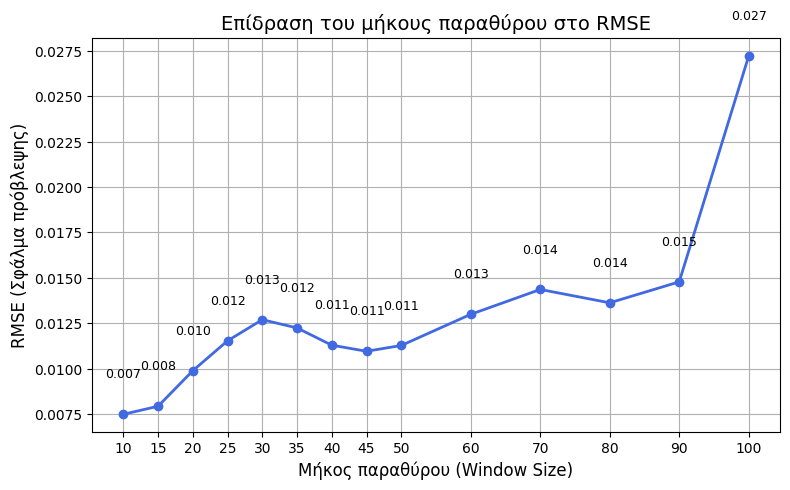

In [41]:
# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± œÑŒøœÖ Œ≥œÅŒ±œÜŒÆŒºŒ±œÑŒøœÇ
plt.figure(figsize=(8, 5))
plt.plot(windows, rmses, marker='o', linestyle='-', linewidth=2, color='royalblue')

# Œ§ŒØœÑŒªŒøœÇ Œ∫Œ±Œπ Œ¨ŒæŒøŒΩŒµœÇ
plt.title("ŒïœÄŒØŒ¥œÅŒ±œÉŒ∑ œÑŒøœÖ ŒºŒÆŒ∫ŒøœÖœÇ œÄŒ±œÅŒ±Œ∏œçœÅŒøœÖ œÉœÑŒø RMSE", fontsize=14)
plt.xlabel("ŒúŒÆŒ∫ŒøœÇ œÄŒ±œÅŒ±Œ∏œçœÅŒøœÖ (Window Size)", fontsize=12)
plt.ylabel("RMSE (Œ£œÜŒ¨ŒªŒºŒ± œÄœÅœåŒ≤ŒªŒµœàŒ∑œÇ)", fontsize=12)

# ŒïŒºœÜŒ¨ŒΩŒπœÉŒ∑ œÑŒπŒºœéŒΩ RMSE œÄŒ¨ŒΩœâ Œ±œÄœå Œ∫Œ¨Œ∏Œµ œÉŒ∑ŒºŒµŒØŒø
for i, rmse in enumerate(rmses):
    plt.text(windows[i], rmse + 0.002, f"{rmse:.3f}", ha='center', fontsize=9)

# Œ£œÑœÖŒª Œ∫Œ±Œπ ŒºŒøœÅœÜŒøœÄŒøŒØŒ∑œÉŒ∑
plt.grid(True)
plt.xticks(windows)
plt.tight_layout()
plt.show()

## Œ†Œ±œÅŒ¨Œ≥ŒµŒπ training Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩŒ± Œ≥ŒπŒ± Œ≠ŒΩŒ± ŒºŒøŒΩœÑŒ≠ŒªŒø (œÄ.œá. ESN) œÄŒøœÖ œÄœÅŒøŒ≤ŒªŒ≠œÄŒµŒπ œÑŒπœÇ ŒµœÄœåŒºŒµŒΩŒµœÇ 10 œÑŒπŒºŒ≠œÇ œÑŒ∑œÇ œáœÅŒøŒΩŒøœÉŒµŒπœÅŒ¨œÇ x, œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπœéŒΩœÑŒ±œÇ œÑŒπœÇ œÄœÅŒøŒ∑Œ≥ŒøœçŒºŒµŒΩŒµœÇ 50.

In [71]:
y_targets = list()
X_ins = list()
prices = list()

# Œ†Œ±œÅŒ¨ŒºŒµœÑœÅŒøŒπ
input_window = 10
forecast_horizon = 10

for i in range(len(df)):
    end = i + input_window + forecast_horizon
    if end > len(df):
        break  # ŒëŒΩ Œ¥ŒµŒΩ Œ≠œáŒøœÖŒºŒµ Œ±œÅŒ∫ŒµœÑŒ¨ Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩŒ± Œ≥ŒπŒ± full œÄŒ±œÅŒ¨Œ∏œÖœÅŒø

    # ŒüŒªœåŒ∫ŒªŒ∑œÅŒø œÑŒø œÄŒ±œÅŒ¨Œ∏œÖœÅŒø: input + forecast
    seq_full = df['x'].iloc[i:end].reset_index(drop=True)

    # ŒïŒØœÉŒøŒ¥ŒøœÇ: ŒøŒπ œÄœÅœéœÑŒµœÇ 50 œÑŒπŒºŒ≠œÇ
    seq_input = seq_full[:input_window]
    X_ins.append(np.round(np.array(seq_input), 5))

    # Œ£œÑœåœáŒøœÇ: ŒøŒπ ŒµœÄœåŒºŒµŒΩŒµœÇ 10 œÑŒπŒºŒ≠œÇ
    seq_target = seq_full[input_window:]  # Œ¥Œ∑ŒªŒ±Œ¥ŒÆ Œ∏Œ≠œÉŒµŒπœÇ 50‚Äì59
    y_targets.append(np.round(np.array(seq_target), 5))

    # ŒìŒπŒ± normalization (œÄœÅŒøŒ±ŒπœÅŒµœÑŒπŒ∫Œ¨)
    prices.append(seq_input.iloc[-1])

X = np.array(X_ins)           # shape = (n_samples, 50)
Y = np.array(y_targets)       # shape = (n_samples, 10)

## ŒîŒπŒ±œáœâœÅŒπœÉŒºœåœÇ train/test set Œ≥ŒπŒ± œáœÅŒøŒΩŒøœÉŒµŒπœÅŒ¨

In [72]:
# ŒîŒπŒ±œáœâœÅŒπœÉŒºœåœÇ œÉŒµ 80% train / 20% test
ts = round(len(X) * 0.8)

train_set = X[:ts]
test_set = X[ts:]

y_train = Y[:ts]
y_test = Y[ts:]

# Œ†œÅŒøœÉŒ∏Œ≠œÑŒøœÖŒºŒµ Œ∫Œ±Œπ œÑŒøŒΩ Œ¥ŒπŒ±œáœâœÅŒπœÉŒºœå Œ≥ŒπŒ± prices (œÑŒµŒªŒµœÖœÑŒ±ŒØŒ± œÑŒπŒºŒÆ ŒµŒπœÉœåŒ¥ŒøœÖ Œ∫Œ¨Œ∏Œµ Œ¥ŒµŒØŒ≥ŒºŒ±œÑŒøœÇ)
prev_train = prices[:ts]
prev_test = prices[ts:]


# Train set

## ŒïŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑ œÑŒøœÖ ESN œÉœÑŒø training set Œ∫Œ±Œπ œÄœÅœåŒ≤ŒªŒµœàŒ∑ œÄŒ¨ŒΩœâ œÉœÑŒø ŒØŒ¥ŒπŒø œÉŒµœÑ, œéœÉœÑŒµ ŒΩŒ± Œ¥ŒµŒπœÇ œÄœéœÇ œÉœÖŒºœÄŒµœÅŒπœÜŒ≠œÅŒµœÑŒ±Œπ œÑŒø ŒºŒøŒΩœÑŒ≠ŒªŒø œÉœÑŒ± ŒØŒ¥ŒπŒ± Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩŒ± ŒºŒµ œÑŒ± ŒøœÄŒøŒØŒ± ŒµŒ∫œÄŒ±ŒπŒ¥ŒµœçœÑŒ∑Œ∫Œµ (training performance).

In [73]:
# ŒïŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑ (fit) œÑŒøœÖ ESN œÉœÑŒø training set
#   - Œ§Œø ESN ¬´ŒºŒ±Œ∏Œ±ŒØŒΩŒµŒπ¬ª œÑŒøŒΩ Œ≥œÅŒ±ŒºŒºŒπŒ∫œå read-out (Ridge) Œ≤Œ±œÉŒπŒ∂œåŒºŒµŒΩŒø œÉœÑŒπœÇ Œ∫Œ±œÑŒ±œÉœÑŒ¨œÉŒµŒπœÇ œÑŒøœÖ reservoir
#   - ŒßœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒµŒØ train_set (X) Œ∫Œ±Œπ y_train (œÉœÑœåœáŒøœÖœÇ) Œ≥ŒπŒ± ŒΩŒ± œÖœÄŒøŒªŒøŒ≥ŒØœÉŒµŒπ œÑŒ± Œ∫Œ±œÑŒ¨ŒªŒªŒ∑ŒªŒ± Œ≤Œ¨œÅŒ∑
esn.fit(train_set, y_train)

# Œ†œÅœåŒ≤ŒªŒµœàŒ∑ (predict) œÑŒøœÖ ŒØŒ¥ŒπŒøœÖ training set
#   - ŒúŒµœÑŒ¨ œÑŒ∑ŒΩ ŒµŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑, œÄŒ±œÅŒ¨Œ≥ŒµŒπ œÑŒπœÇ œÑŒπŒºŒ≠œÇ œÄŒøœÖ ¬´œÄŒπœÉœÑŒµœçŒµŒπ¬ª œåœÑŒπ Œ±ŒΩœÑŒπœÉœÑŒøŒπœáŒøœçŒΩ œÉœÑŒ± train_set
#   - ŒëœÄŒøŒ∏Œ∑Œ∫ŒµœçŒøœÖŒºŒµ œÑŒø Œ±œÄŒøœÑŒ≠ŒªŒµœÉŒºŒ± œÉŒµ predictions_train
predictions_train = esn.predict(train_set)

In [74]:
ts = round(len(X)*0.8)
#inputs
train_set = X[:ts]
test_set = X[ts:]
#outputs
y_train = y_targets[:ts]
y_test = y_targets[ts:]

y_train = np.array(y_train)
y_test = np.array(y_test)

In [75]:
# ŒïŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑ (fit) œÑŒøœÖ ESN œÉœÑŒø training set
#   - Œ§Œø ESN ¬´ŒºŒ±Œ∏Œ±ŒØŒΩŒµŒπ¬ª œÑŒøŒΩ Œ≥œÅŒ±ŒºŒºŒπŒ∫œå read-out (Ridge) Œ≤Œ±œÉŒπŒ∂œåŒºŒµŒΩŒø œÉœÑŒπœÇ Œ∫Œ±œÑŒ±œÉœÑŒ¨œÉŒµŒπœÇ œÑŒøœÖ reservoir
#   - ŒßœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒµŒØ train_set (X) Œ∫Œ±Œπ y_train (œÉœÑœåœáŒøœÖœÇ) Œ≥ŒπŒ± ŒΩŒ± œÖœÄŒøŒªŒøŒ≥ŒØœÉŒµŒπ œÑŒ± Œ∫Œ±œÑŒ¨ŒªŒªŒ∑ŒªŒ± Œ≤Œ¨œÅŒ∑
esn.fit(train_set, y_train)

# Œ†œÅœåŒ≤ŒªŒµœàŒ∑ (predict) œÑŒøœÖ ŒØŒ¥ŒπŒøœÖ training set
#   - ŒúŒµœÑŒ¨ œÑŒ∑ŒΩ ŒµŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑, œÄŒ±œÅŒ¨Œ≥ŒµŒπ œÑŒπœÇ œÑŒπŒºŒ≠œÇ œÄŒøœÖ ¬´œÄŒπœÉœÑŒµœçŒµŒπ¬ª œåœÑŒπ Œ±ŒΩœÑŒπœÉœÑŒøŒπœáŒøœçŒΩ œÉœÑŒ± train_set
#   - ŒëœÄŒøŒ∏Œ∑Œ∫ŒµœçŒøœÖŒºŒµ œÑŒø Œ±œÄŒøœÑŒ≠ŒªŒµœÉŒºŒ± œÉŒµ predictions_train
predictions_train = esn.predict(train_set)


## ŒüœÄœÑŒπŒ∫ŒøœÄŒøŒπŒµŒØ œÑŒ∑ multi-step œÄœÅœåŒ≤ŒªŒµœàŒ∑ œÑŒøœÖ ŒºŒøŒΩœÑŒ≠ŒªŒøœÖ Œ≥ŒπŒ± Œ≠ŒΩŒ± œÉœÖŒ≥Œ∫ŒµŒ∫œÅŒπŒºŒ≠ŒΩŒø Œ¥ŒµŒØŒ≥ŒºŒ± ŒµŒπœÉœåŒ¥ŒøœÖ. Œ£œáŒµŒ¥ŒπŒ¨Œ∂ŒµŒπ œÑœåœÉŒø œÑŒπœÇ œÄœÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ œåœÉŒø Œ∫Œ±Œπ œÑŒπœÇ œÄœÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫Œ≠œÇ œÑŒπŒºŒ≠œÇ Œ≥ŒπŒ± œÑŒ± ŒµœÄœåŒºŒµŒΩŒ± 10 Œ≤ŒÆŒºŒ±œÑŒ± (t+1 Œ≠œâœÇ t+10).




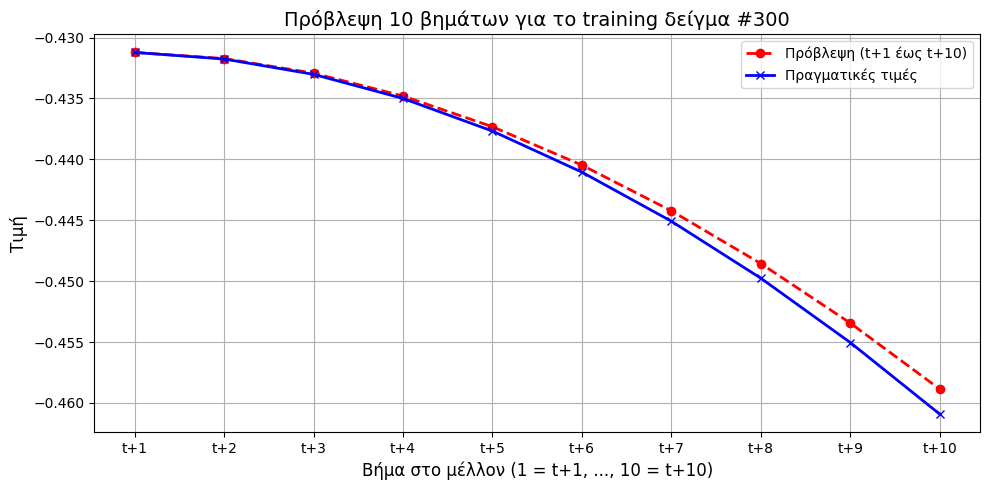

In [78]:
# ŒïœÄŒØŒªŒµŒæŒµ œÑŒø Œ¥ŒµŒØŒ≥ŒºŒ± œÄŒøœÖ Œ∏Œ≠ŒªŒµŒπœÇ ŒΩŒ± œÄœÅŒøŒ≤Œ¨ŒªŒªŒµŒπœÇ (œÄ.œá. Œ¥ŒµŒØŒ≥ŒºŒ± #10)
sample_index = 300

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± œÑŒøœÖ Œ¥ŒπŒ±Œ≥œÅŒ¨ŒºŒºŒ±œÑŒøœÇ
plt.figure(figsize=(10, 5))

# Œ†œÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ Œ≥ŒπŒ± t+1 Œ≠œâœÇ t+10
plt.plot(
    predictions_train[sample_index],
    label='Œ†œÅœåŒ≤ŒªŒµœàŒ∑ (t+1 Œ≠œâœÇ t+10)',
    linestyle='--',
    marker='o',
    linewidth=2,
    color='red'
)

# Œ†œÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫Œ≠œÇ œÑŒπŒºŒ≠œÇ Œ≥ŒπŒ± t+1 Œ≠œâœÇ t+10
plt.plot(
    y_train[sample_index],
    label='Œ†œÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫Œ≠œÇ œÑŒπŒºŒ≠œÇ',
    linestyle='-',
    marker='x',
    linewidth=2,
    color='blue'
)

# ŒïœÄŒµŒæŒ∑Œ≥ŒÆœÉŒµŒπœÇ Œ∫Œ±Œπ styling
plt.title(f'Œ†œÅœåŒ≤ŒªŒµœàŒ∑ 10 Œ≤Œ∑ŒºŒ¨œÑœâŒΩ Œ≥ŒπŒ± œÑŒø training Œ¥ŒµŒØŒ≥ŒºŒ± #{sample_index}', fontsize=14)
plt.xlabel('ŒíŒÆŒºŒ± œÉœÑŒø ŒºŒ≠ŒªŒªŒøŒΩ (1 = t+1, ..., 10 = t+10)', fontsize=12)
plt.ylabel('Œ§ŒπŒºŒÆ', fontsize=12)
plt.xticks(ticks=range(10), labels=[f't+{i+1}' for i in range(10)])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



## ŒëœÖœÑŒÆ Œ∑ Œ¥ŒπŒ±Œ¥ŒπŒ∫Œ±œÉŒØŒ± œÖœÄŒøŒªŒøŒ≥ŒØŒ∂ŒµŒπ œÄœåœÉŒµœÇ œÜŒøœÅŒ≠œÇ œÑŒø ESN ‚ÄúŒ≠œÄŒπŒ±œÉŒµ‚Äù œÉœâœÉœÑŒ¨ œÑŒ∑ŒΩ œÑŒ¨œÉŒ∑ (œÄŒ¨ŒΩœâ ŒÆ Œ∫Œ¨œÑœâ) œÑŒ∑œÇ œÑŒπŒºŒÆœÇ œÉŒµ œÉœáŒ≠œÉŒ∑ ŒºŒµ œÑŒ∑ŒΩ œÄœÅŒøŒ∑Œ≥ŒøœçŒºŒµŒΩŒ∑ œÑŒπŒºŒÆ œÑŒøœÖ œÄŒ±œÅŒ±Œ∏œçœÅŒøœÖ œÉœÑŒø Training set :
## ŒëœÖœÑœå œÑŒø ŒºœÄŒªŒøŒ∫ œÖœÄŒøŒªŒøŒ≥ŒØŒ∂ŒµŒπ œÑŒø directional accuracy Œ±ŒΩŒ¨ œáœÅŒøŒΩŒπŒ∫œå Œ≤ŒÆŒºŒ± œÄœÅœåŒ≤ŒªŒµœàŒ∑œÇ (t+1, t+2, ..., t+10) Œ≥ŒπŒ± multi-step forecasting ŒºŒµ ESN 

In [79]:


# Œ†ŒØŒΩŒ±Œ∫Œ±œÇ Œ≥ŒπŒ± Œ±œÄŒøŒ∏ŒÆŒ∫ŒµœÖœÉŒ∑ accuracy Œ±ŒΩŒ¨ Œ≤ŒÆŒºŒ±
directional_accuracies = []

# Œ†œåœÉŒ± forecast steps Œ≠œáŒµŒπœÇ (œÄ.œá. 10)
forecast_horizon = y_train.shape[1]  # = 10

for step in range(forecast_horizon):
    correct = 0
    total = len(y_train)

    for i in range(total):
        real = y_train[i, step]               # Œ†œÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫ŒÆ œÑŒπŒºŒÆ Œ≥ŒπŒ± œÑŒø step
        pred = predictions_train[i, step]     # Œ†œÅœåŒ≤ŒªŒµœàŒ∑ Œ≥ŒπŒ± œÑŒø ŒØŒ¥ŒπŒø step
        prev_val = prices[i]                  # Œ§ŒµŒªŒµœÖœÑŒ±ŒØŒ± œÑŒπŒºŒÆ ŒµŒπœÉœåŒ¥ŒøœÖ

        # ŒàŒªŒµŒ≥œáŒøœÇ Œ∫Œ±œÑŒµœçŒ∏œÖŒΩœÉŒ∑œÇ
        if real > prev_val and pred > prev_val:
            correct += 1
        elif real < prev_val and pred < prev_val:
            correct += 1

    # Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ œÄŒøœÉŒøœÉœÑŒøœç ŒµœÄŒπœÑœÖœáŒØŒ±œÇ Œ≥ŒπŒ± Œ±œÖœÑœå œÑŒø Œ≤ŒÆŒºŒ±
    acc = correct / total
    directional_accuracies.append(acc)

# ŒïŒºœÜŒ¨ŒΩŒπœÉŒ∑ Œ±œÄŒøœÑŒµŒªŒµœÉŒºŒ¨œÑœâŒΩ
for i, acc in enumerate(directional_accuracies):
    print(f"Directional accuracy œÉœÑŒø t+{i+1}: {acc:.3f}")


Directional accuracy œÉœÑŒø t+1: 0.998
Directional accuracy œÉœÑŒø t+2: 0.998
Directional accuracy œÉœÑŒø t+3: 0.998
Directional accuracy œÉœÑŒø t+4: 0.997
Directional accuracy œÉœÑŒø t+5: 0.996
Directional accuracy œÉœÑŒø t+6: 0.996
Directional accuracy œÉœÑŒø t+7: 0.995
Directional accuracy œÉœÑŒø t+8: 0.993
Directional accuracy œÉœÑŒø t+9: 0.990
Directional accuracy œÉœÑŒø t+10: 0.990


## ŒëœÄœåŒ∫ŒªŒπœÉŒ∑ œÄœÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫ŒÆœÇ Œ±œÄŒø œÄœÅŒøŒ≤ŒªŒµœÄœåŒºŒµŒΩŒ∑ œÑŒπŒºŒÆ Œ≥ŒπŒ± Œ∫Œ¨Œ∏Œµ Œ≤ŒÆŒºŒ± œáœÅœåŒΩŒøœÖ œÉœÑŒø train set

In [80]:
mae_train = []
forecast_horizon = y_train.shape[1]

for step in range(forecast_horizon):
    error = np.abs(predictions_train[:, step] - y_train[:, step])
    mae = np.mean(error)
    mae_train.append(mae)

# ŒïŒºœÜŒ¨ŒΩŒπœÉŒ∑
for i, err in enumerate(mae_train):
    print(f"MAE œÉœÑŒø t+{i+1}: {err:.4f}")


MAE œÉœÑŒø t+1: 0.0001
MAE œÉœÑŒø t+2: 0.0002
MAE œÉœÑŒø t+3: 0.0003
MAE œÉœÑŒø t+4: 0.0006
MAE œÉœÑŒø t+5: 0.0012
MAE œÉœÑŒø t+6: 0.0020
MAE œÉœÑŒø t+7: 0.0032
MAE œÉœÑŒø t+8: 0.0050
MAE œÉœÑŒø t+9: 0.0072
MAE œÉœÑŒø t+10: 0.0101


## Œ†ŒøœÉŒøœÉœÑŒπŒ±ŒØŒ± ŒëœÄœåŒ∫ŒªŒπœÉŒ∑ (MAPE) œÉœÑŒø train_set

In [81]:
mape_train = []

for step in range(forecast_horizon):
    actuals = y_train[:, step]
    preds   = predictions_train[:, step]

    # ŒúŒ¨œÉŒ∫Œ± Œ≥ŒπŒ± ŒΩŒ± Œ±œÄŒøœÜœçŒ≥ŒµŒπœÇ Œ¥ŒπŒ±ŒØœÅŒµœÉŒ∑ ŒºŒµ 0
    non_zero_mask = actuals != 0

    percent_errors = np.abs((preds[non_zero_mask] - actuals[non_zero_mask]) / actuals[non_zero_mask]) * 100
    mape = np.mean(percent_errors)
    mape_train.append(mape)

# ŒïŒºœÜŒ¨ŒΩŒπœÉŒ∑
for i, err in enumerate(mape_train):
    print(f"MAPE œÉœÑŒø t+{i+1}: {err:.2f}%")


MAPE œÉœÑŒø t+1: 0.08%
MAPE œÉœÑŒø t+2: 0.13%
MAPE œÉœÑŒø t+3: 0.25%
MAPE œÉœÑŒø t+4: 0.49%
MAPE œÉœÑŒø t+5: 0.94%
MAPE œÉœÑŒø t+6: 1.70%
MAPE œÉœÑŒø t+7: 2.73%
MAPE œÉœÑŒø t+8: 4.05%
MAPE œÉœÑŒø t+9: 6.01%
MAPE œÉœÑŒø t+10: 8.30%


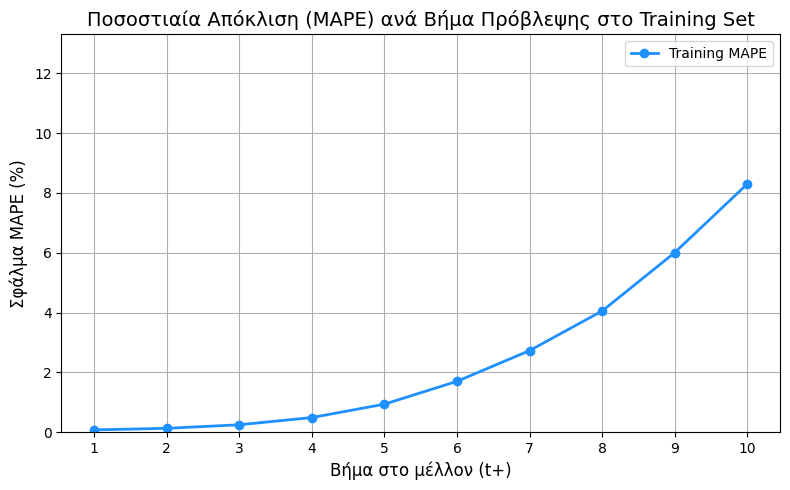

In [82]:
plt.figure(figsize=(8, 5))

# ŒöŒ±ŒºœÄœçŒªŒ∑ MAPE Œ±ŒΩŒ¨ Œ≤ŒÆŒºŒ± (t+1 Œ≠œâœÇ t+10)
plt.plot(
    range(1, forecast_horizon + 1),   # x: œÑŒ± Œ≤ŒÆŒºŒ±œÑŒ±
    mape_train,                       # y: MAPE Œ±ŒΩŒ¨ Œ≤ŒÆŒºŒ±
    marker='o',
    linewidth=2,
    linestyle='-',
    color='dodgerblue',
    label='Training MAPE'
)

# Œ£œÑœÖŒª Œ∫Œ±Œπ ŒµœÄŒµŒæŒ∑Œ≥ŒÆœÉŒµŒπœÇ
plt.title("Œ†ŒøœÉŒøœÉœÑŒπŒ±ŒØŒ± ŒëœÄœåŒ∫ŒªŒπœÉŒ∑ (MAPE) Œ±ŒΩŒ¨ ŒíŒÆŒºŒ± Œ†œÅœåŒ≤ŒªŒµœàŒ∑œÇ œÉœÑŒø Training Set", fontsize=14)
plt.xlabel("ŒíŒÆŒºŒ± œÉœÑŒø ŒºŒ≠ŒªŒªŒøŒΩ (t+)", fontsize=12)
plt.ylabel("Œ£œÜŒ¨ŒªŒºŒ± MAPE (%)", fontsize=12)
plt.ylim(0, max(mape_train) + 5)
plt.grid(True)
plt.xticks(ticks=range(1, forecast_horizon + 1))
plt.legend()
plt.tight_layout()
plt.show()


### ŒíŒªŒ≠œÄŒøœÖŒºŒµ œåœÑŒπ œåœÉŒø œÄŒπŒø ŒºŒ±Œ∫œÅŒπŒ¨ œÄœÅŒøœÉœÄŒ±Œ∏ŒøœçŒºŒµ ŒΩŒ± œÄœÅŒøŒ≤ŒªŒ≠œàŒøœÖŒºŒµ œÉœÑŒøŒΩ œáœÅœåŒΩŒø œÑŒø œÉœÜŒ¨ŒªŒºŒ± ŒºŒµŒ≥Œ±ŒªœéŒΩŒµŒπ

# Test set

# esn.predict(test_set): œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒµŒØ œÑŒø ŒÆŒ¥Œ∑ ‚ÄúŒµŒ∫œÄŒ±ŒπŒ¥ŒµœÖŒºŒ≠ŒΩŒø‚Äù ŒºŒøŒΩœÑŒ≠ŒªŒø (esn.fit Œ≠œáŒµŒπ ŒÆŒ¥Œ∑ œÑœÅŒ≠ŒæŒµŒπ) œéœÉœÑŒµ ŒΩŒ± ŒµŒ∫œÑŒπŒºŒÆœÉŒµŒπ œÑŒπœÇ ŒµœÄœåŒºŒµŒΩŒµœÇ œÑŒπŒºŒ≠œÇ Œ≥ŒπŒ± Œ∫Œ¨Œ∏Œµ œÄŒ±œÅŒ¨Œ∏œÖœÅŒø œÉœÑŒø test_set.

## Œ§Œø ESN œÉŒøœÖ œÄŒ±œÅŒ¨Œ≥ŒµŒπ œÄœÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ multi-step (œÄ.œá. 10 Œ≤Œ∑ŒºŒ¨œÑœâŒΩ) œÄŒ¨ŒΩœâ œÉœÑŒø test set, Œ¥Œ∑ŒªŒ±Œ¥ŒÆ œÉŒµ Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩŒ± œÄŒøœÖ Œ¥ŒµŒΩ Œ≠œáŒµŒπ Œ¥ŒµŒπ œÄŒøœÑŒ≠ Œ∫Œ±œÑŒ¨ œÑŒ∑ŒΩ ŒµŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑. ŒëœÖœÑŒÆ ŒµŒØŒΩŒ±Œπ Œ∫Œ±Œπ Œ∑ œÄŒπŒø Œ∫œÅŒØœÉŒπŒºŒ∑ œÉœÑŒπŒ≥ŒºŒÆ Œ≥ŒπŒ± ŒΩŒ± Œ±ŒæŒπŒøŒªŒøŒ≥ŒÆœÉŒµŒπœÇ:
### Œ†œåœÉŒø Œ∫Œ±ŒªŒ¨ Œ≥ŒµŒΩŒπŒ∫ŒµœçŒµŒπ œÑŒø ŒºŒøŒΩœÑŒ≠ŒªŒø œÉŒøœÖ
### ŒëŒΩ œÄœÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫Œ¨ "Œ≠ŒºŒ±Œ∏Œµ" œÑŒø œÄœÅœåŒ≤ŒªŒ∑ŒºŒ± ŒÆ Œ±œÄŒªœéœÇ Œ≠ŒºŒ±Œ∏Œµ œÑŒø training set

In [83]:
# Œ†Œ±œÅŒ¨Œ≥ŒøœÖŒºŒµ œÑŒπœÇ œÄœÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ œÑŒøœÖ ESN Œ≥ŒπŒ± œÑŒ± ŒΩŒ≠Œ±, Œ±Œ∏Œ≠Œ±œÑŒ± Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩŒ± œÑŒøœÖ test set
predictions_test = esn.predict(test_set)

## ŒüœÄœÑŒπŒ∫ŒøœÄŒøŒπŒµŒØ œÑŒ∑ multi-step œÄœÅœåŒ≤ŒªŒµœàŒ∑ œÑŒøœÖ ŒºŒøŒΩœÑŒ≠ŒªŒøœÖ Œ≥ŒπŒ± Œ≠ŒΩŒ± œÉœÖŒ≥Œ∫ŒµŒ∫œÅŒπŒºŒ≠ŒΩŒø Œ¥ŒµŒØŒ≥ŒºŒ± ŒµŒπœÉœåŒ¥ŒøœÖ. Œ£œáŒµŒ¥ŒπŒ¨Œ∂ŒµŒπ œÑœåœÉŒø œÑŒπœÇ œÄœÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ œåœÉŒø Œ∫Œ±Œπ œÑŒπœÇ œÄœÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫Œ≠œÇ œÑŒπŒºŒ≠œÇ Œ≥ŒπŒ± œÑŒ± ŒµœÄœåŒºŒµŒΩŒ± 10 Œ≤ŒÆŒºŒ±œÑŒ± (t+1 Œ≠œâœÇ t+10).
### Œ§ŒπœÇ œÄœÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ œÑŒøœÖ ESN Œ≥ŒπŒ± œÑŒ± ŒµœÄœåŒºŒµŒΩŒ± 10 Œ≤ŒÆŒºŒ±œÑŒ± (œÉŒµ Œ∫œåŒ∫Œ∫ŒπŒΩŒø
### Œ§ŒπœÇ œÄœÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫Œ≠œÇ œÑŒπŒºŒ≠œÇ (œÉŒµ ŒºœÄŒªŒµ)
### ŒìŒπŒ± Œ≠ŒΩŒ± œÉœÖŒ≥Œ∫ŒµŒ∫œÅŒπŒºŒ≠ŒΩŒø Œ¥ŒµŒØŒ≥ŒºŒ± œÑŒøœÖ test set (sample_index = 80)



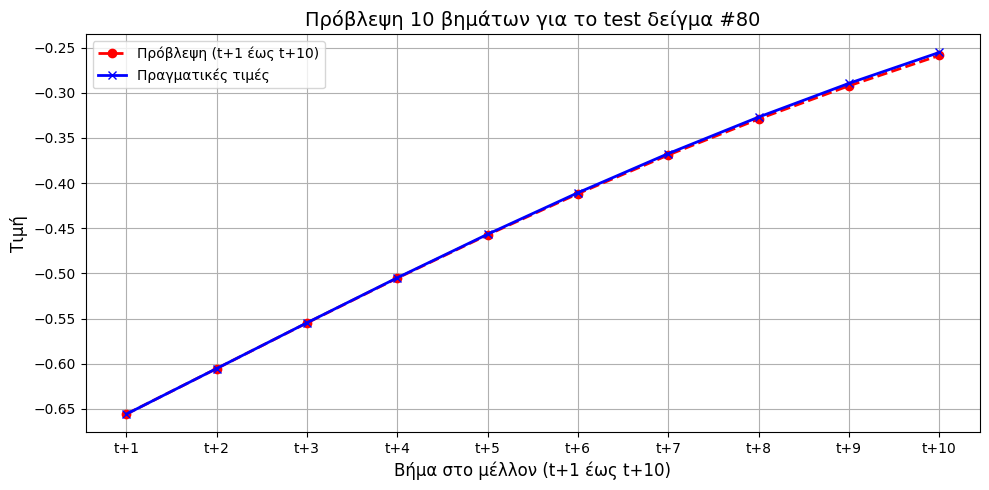

In [90]:


# ŒîŒπŒ¨ŒªŒµŒæŒµ Œ¥ŒµŒØŒ≥ŒºŒ± Œ±œÄœå œÑŒø test set (œÄ.œá. œÑŒø 10Œø Œ¥ŒµŒØŒ≥ŒºŒ± ŒºŒ≠œÉŒ± œÉœÑŒø test set)
sample_index = 80

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± Œ≥œÅŒ±œÜŒÆŒºŒ±œÑŒøœÇ
plt.figure(figsize=(10, 5))

# Œ†œÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ (10 Œ≤ŒÆŒºŒ±œÑŒ± œÉœÑŒø ŒºŒ≠ŒªŒªŒøŒΩ)
plt.plot(
    predictions_test[sample_index],
    label='Œ†œÅœåŒ≤ŒªŒµœàŒ∑ (t+1 Œ≠œâœÇ t+10)',
    linestyle='--',
    marker='o',
    linewidth=2,
    color='red'
)

# Œ†œÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫Œ≠œÇ œÑŒπŒºŒ≠œÇ (ground truth)
plt.plot(
    y_test[sample_index],
    label='Œ†œÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫Œ≠œÇ œÑŒπŒºŒ≠œÇ',
    linestyle='-',
    marker='x',
    linewidth=2,
    color='blue'
)

# ŒîŒπŒ±ŒºœåœÅœÜœâœÉŒ∑ Œ∫Œ±Œπ ŒµœÄŒµŒæŒ∑Œ≥ŒÆœÉŒµŒπœÇ
plt.title(f'Œ†œÅœåŒ≤ŒªŒµœàŒ∑ 10 Œ≤Œ∑ŒºŒ¨œÑœâŒΩ Œ≥ŒπŒ± œÑŒø test Œ¥ŒµŒØŒ≥ŒºŒ± #{sample_index}', fontsize=14)
plt.xlabel('ŒíŒÆŒºŒ± œÉœÑŒø ŒºŒ≠ŒªŒªŒøŒΩ (t+1 Œ≠œâœÇ t+10)', fontsize=12)
plt.ylabel('Œ§ŒπŒºŒÆ', fontsize=12)
plt.xticks(ticks=range(10), labels=[f't+{i+1}' for i in range(10)])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## ŒëœÖœÑœå œÑŒø Œ∫ŒøŒºŒºŒ¨œÑŒπ Œ∫œéŒ¥ŒπŒ∫Œ± œÖœÄŒøŒªŒøŒ≥ŒØŒ∂ŒµŒπ œÑŒ∑ŒΩ ¬´Œ∫Œ±œÑŒµœÖŒ∏œÖŒΩœÑŒπŒ∫ŒÆ Œ±Œ∫œÅŒØŒ≤ŒµŒπŒ±¬ª (directional accuracy) œÑŒøœÖ ŒºŒøŒΩœÑŒ≠ŒªŒøœÖ œÉœÑŒø test set, Œ¥Œ∑ŒªŒ±Œ¥ŒÆ œÑŒø œÄŒøœÉŒøœÉœÑœå œÑœâŒΩ œÜŒøœÅœéŒΩ œÄŒøœÖ ŒºŒ¨ŒΩœÑŒµœàŒµ œÉœâœÉœÑŒ¨ Œ±ŒΩ Œ∑ œÑŒπŒºŒÆ Œ∏Œ± Œ∫ŒπŒΩŒ∑Œ∏ŒµŒØ œÄŒ¨ŒΩœâ ŒÆ Œ∫Œ¨œÑœâ œÉŒµ œÉœáŒ≠œÉŒ∑ ŒºŒµ œÑŒ∑ŒΩ œÄœÅŒøŒ∑Œ≥ŒøœçŒºŒµŒΩŒ∑ œÑŒπŒºŒÆ.

In [91]:
# Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ directional accuracy Œ≥ŒπŒ± Œ∫Œ¨Œ∏Œµ Œ≤ŒÆŒºŒ± œÉœÑŒø ŒºŒ≠ŒªŒªŒøŒΩ (t+1 Œ≠œâœÇ t+10) œÉœÑŒø test set

forecast_horizon = y_test.shape[1]  # œÄ.œá. 10
directional_accuracies_test = []

for step in range(forecast_horizon):
    correct = 0
    total = len(y_test)

    for i in range(total):
        real = y_test[i, step]              # Œ†œÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫ŒÆ œÑŒπŒºŒÆ Œ≥ŒπŒ± œÑŒø Œ≤ŒÆŒºŒ± Œ±œÖœÑœå
        pred = predictions_test[i, step]    # Œ†œÅœåŒ≤ŒªŒµœàŒ∑ Œ≥ŒπŒ± œÑŒø ŒØŒ¥ŒπŒø Œ≤ŒÆŒºŒ±
        prev_val = prev_test[i]             # Œ§ŒµŒªŒµœÖœÑŒ±ŒØŒ± œÑŒπŒºŒÆ ŒµŒπœÉœåŒ¥ŒøœÖ Œ≥ŒπŒ± œÑŒø Œ¥ŒµŒØŒ≥ŒºŒ±

        if real > prev_val and pred > prev_val:
            correct += 1
        elif real < prev_val and pred < prev_val:
            correct += 1

    acc = correct / total
    directional_accuracies_test.append(acc)

# ŒïŒ∫œÑœçœÄœâœÉŒ∑ Œ±œÄŒøœÑŒµŒªŒµœÉŒºŒ¨œÑœâŒΩ Œ±ŒΩŒ¨ forecast Œ≤ŒÆŒºŒ±
for i, acc in enumerate(directional_accuracies_test):
    print(f"Test set - Directional accuracy œÉœÑŒø t+{i+1}: {acc:.3f}")


Test set - Directional accuracy œÉœÑŒø t+1: 0.972
Test set - Directional accuracy œÉœÑŒø t+2: 0.973
Test set - Directional accuracy œÉœÑŒø t+3: 0.972
Test set - Directional accuracy œÉœÑŒø t+4: 0.972
Test set - Directional accuracy œÉœÑŒø t+5: 0.972
Test set - Directional accuracy œÉœÑŒø t+6: 0.973
Test set - Directional accuracy œÉœÑŒø t+7: 0.972
Test set - Directional accuracy œÉœÑŒø t+8: 0.973
Test set - Directional accuracy œÉœÑŒø t+9: 0.971
Test set - Directional accuracy œÉœÑŒø t+10: 0.973


## ŒëœÄœåŒ∫ŒªŒπœÉŒ∑ œÄœÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫ŒÆœÇ Œ±œÄŒø œÄœÅŒøŒ≤ŒªŒµœÄœåŒºŒµŒΩŒ∑ œÑŒπŒºŒÆ Œ≥ŒπŒ± Œ∫Œ¨Œ∏Œµ Œ≤ŒÆŒºŒ± œáœÅœåŒΩŒøœÖ œÉœÑŒø test set

In [92]:


# Œ†ŒØŒΩŒ±Œ∫Œ±œÇ Œ±œÄŒøŒ∫ŒªŒØœÉŒµœâŒΩ Œ±ŒΩŒ¨ Œ≤ŒÆŒºŒ±
stepwise_errors = []

# ŒüœÅŒØŒ∂ŒøœÖŒºŒµ œÑŒøŒΩ œáœÅŒøŒΩŒπŒ∫œå ŒøœÅŒØŒ∂ŒøŒΩœÑŒ±
forecast_horizon = y_test.shape[1]

# ŒìŒπŒ± Œ∫Œ¨Œ∏Œµ œáœÅŒøŒΩŒπŒ∫œå Œ≤ŒÆŒºŒ±
for step in range(forecast_horizon):
    # ŒëœÄœåŒªœÖœÑŒµœÇ Œ±œÄŒøŒ∫ŒªŒØœÉŒµŒπœÇ Œ≥ŒπŒ± œåŒªŒ± œÑŒ± Œ¥ŒµŒØŒ≥ŒºŒ±œÑŒ± œÉœÑŒø œÉœÖŒ≥Œ∫ŒµŒ∫œÅŒπŒºŒ≠ŒΩŒø Œ≤ŒÆŒºŒ±
    step_errors = np.abs(predictions_test[:, step] - y_test[:, step])
    
    # ŒúŒ≠œÉŒ∑ Œ±œÄœåŒ∫ŒªŒπœÉŒ∑ œÉœÑŒø œÉœÖŒ≥Œ∫ŒµŒ∫œÅŒπŒºŒ≠ŒΩŒø Œ≤ŒÆŒºŒ± (MAE)
    mean_error = np.mean(step_errors)
    stepwise_errors.append(mean_error)

# ŒïŒºœÜŒ¨ŒΩŒπœÉŒ∑ Œ±ŒΩŒ¨ Œ≤ŒÆŒºŒ±
for i, err in enumerate(stepwise_errors):
    print(f"ŒúŒ≠œÉŒ∑ Œ±œÄœåŒ∫ŒªŒπœÉŒ∑ œÉœÑŒø t+{i+1}: {err:.4f}")


ŒúŒ≠œÉŒ∑ Œ±œÄœåŒ∫ŒªŒπœÉŒ∑ œÉœÑŒø t+1: 0.0070
ŒúŒ≠œÉŒ∑ Œ±œÄœåŒ∫ŒªŒπœÉŒ∑ œÉœÑŒø t+2: 0.0096
ŒúŒ≠œÉŒ∑ Œ±œÄœåŒ∫ŒªŒπœÉŒ∑ œÉœÑŒø t+3: 0.0139
ŒúŒ≠œÉŒ∑ Œ±œÄœåŒ∫ŒªŒπœÉŒ∑ œÉœÑŒø t+4: 0.0210
ŒúŒ≠œÉŒ∑ Œ±œÄœåŒ∫ŒªŒπœÉŒ∑ œÉœÑŒø t+5: 0.0322
ŒúŒ≠œÉŒ∑ Œ±œÄœåŒ∫ŒªŒπœÉŒ∑ œÉœÑŒø t+6: 0.0489
ŒúŒ≠œÉŒ∑ Œ±œÄœåŒ∫ŒªŒπœÉŒ∑ œÉœÑŒø t+7: 0.0723
ŒúŒ≠œÉŒ∑ Œ±œÄœåŒ∫ŒªŒπœÉŒ∑ œÉœÑŒø t+8: 0.1030
ŒúŒ≠œÉŒ∑ Œ±œÄœåŒ∫ŒªŒπœÉŒ∑ œÉœÑŒø t+9: 0.1410
ŒúŒ≠œÉŒ∑ Œ±œÄœåŒ∫ŒªŒπœÉŒ∑ œÉœÑŒø t+10: 0.1860


## Œ†ŒøœÉŒøœÉœÑŒπŒ±ŒØŒ± Œ±œÄœåŒ∫ŒªŒπœÉŒ∑ Œ†œÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫ŒÆœÇ ŒºŒµ Œ†œÅŒøŒ≤ŒªŒµœÄœåŒºŒµŒΩŒ∑ œÑŒπŒºŒ∑

In [93]:
stepwise_mape = []
forecast_horizon = y_test.shape[1]

for step in range(forecast_horizon):
    actuals = y_test[:, step]
    preds   = predictions_test[:, step]

    # ŒúŒ¨œÉŒ∫Œ± Œ≥ŒπŒ± ŒΩŒ± Œ±Œ≥ŒΩŒøŒÆœÉŒøœÖŒºŒµ ŒºŒ∑Œ¥ŒµŒΩŒπŒ∫Œ≠œÇ œÄœÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫Œ≠œÇ œÑŒπŒºŒ≠œÇ
    non_zero_mask = actuals != 0

    # Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ œÄŒøœÉŒøœÉœÑŒπŒ±ŒØŒøœÖ œÉœÜŒ¨ŒªŒºŒ±œÑŒøœÇ ŒºœåŒΩŒø œåœÄŒøœÖ y ‚â† 0
    percent_errors = np.abs((preds[non_zero_mask] - actuals[non_zero_mask]) / actuals[non_zero_mask]) * 100
    mape = np.mean(percent_errors)

    stepwise_mape.append(mape)

# ŒïŒºœÜŒ¨ŒΩŒπœÉŒ∑ Œ±œÄŒøœÑŒµŒªŒµœÉŒºŒ¨œÑœâŒΩ
for i, err in enumerate(stepwise_mape):
    print(f"MAPE œÉœÑŒø t+{i+1}: {err:.2f}%")


MAPE œÉœÑŒø t+1: 2.17%
MAPE œÉœÑŒø t+2: 3.17%
MAPE œÉœÑŒø t+3: 4.94%
MAPE œÉœÑŒø t+4: 8.05%
MAPE œÉœÑŒø t+5: 13.24%
MAPE œÉœÑŒø t+6: 21.35%
MAPE œÉœÑŒø t+7: 33.19%
MAPE œÉœÑŒø t+8: 49.71%
MAPE œÉœÑŒø t+9: 71.50%
MAPE œÉœÑŒø t+10: 99.50%


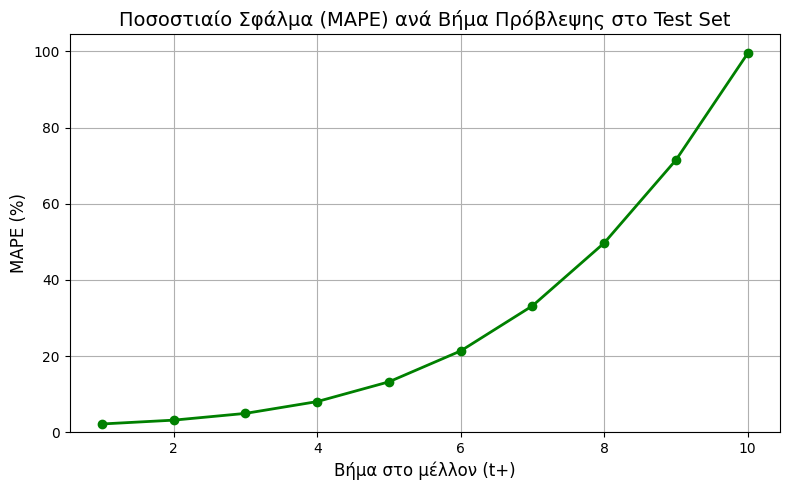

In [94]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, forecast_horizon+1), stepwise_mape, marker='o', linewidth=2, color='green')
plt.title("Œ†ŒøœÉŒøœÉœÑŒπŒ±ŒØŒø Œ£œÜŒ¨ŒªŒºŒ± (MAPE) Œ±ŒΩŒ¨ ŒíŒÆŒºŒ± Œ†œÅœåŒ≤ŒªŒµœàŒ∑œÇ œÉœÑŒø Test Set", fontsize=14)
plt.xlabel("ŒíŒÆŒºŒ± œÉœÑŒø ŒºŒ≠ŒªŒªŒøŒΩ (t+)", fontsize=12)
plt.ylabel("MAPE (%)", fontsize=12)
plt.ylim(0, max(stepwise_mape) + 5)
plt.grid(True)
plt.tight_layout()
plt.show()


## Œ†œÅŒøœÜŒ±ŒΩœéœÇ œÄŒ±œÅŒ±œÑŒ∑œÅŒøœçŒºŒµ œåœÑŒπ œåœÉŒø œÄŒπŒø ŒºŒ±Œ∫œÅŒøœÄœÅœåŒ∏ŒµœÉŒºŒ± œÄœÅŒøœÉœÄŒ±Œ∏ŒøœçŒºŒµ ŒΩŒ± œÄœÅŒøŒ≤ŒªŒ≠œàŒøœÖŒºŒµ œÑŒø œÉœÜŒ¨ŒªŒºŒ± Œ±œÖŒæŒ¨ŒΩŒµŒπ